## Importaciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import sys
import time

##### Corremos un cronometro

In [2]:
tiempo_inicial = time.time()

#### Configuración para Visualización Completa de Columnas en DataFrames de Pandas

Habilitar la Visualización de Todas las Columnas en DataFrames: Aquí, utilizamos **pd.set_option('display.max_columns', None)** para ajustar las opciones de visualización en pandas. Esta configuración específica permite que todas las columnas de un DataFrame sean visibles cuando lo imprimimos o lo inspeccionamos en el notebook.

Este ajuste es particularmente **valioso en la fase de análisis exploratorio de datos**, donde queremos tener una **visión completa de nuestros datos** y no perder ninguna columna importante durante la inspección visual. Nos permite tener una mejor comprensión del conjunto de datos con el que estamos trabajando, especialmente cuando se trata de conjuntos de datos con un gran número de características o columnas.

In [3]:
# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook



### Carga de Datos de Entrenamiento y Prueba: 

In [4]:
# Cargar los datos de entrenamiento
train_df = pd.read_csv('train.csv')

# Cargar los datos de prueba
test_df = pd.read_csv('test.csv')

# Cargar el archivo de envío de muestra
sample_submission_df = pd.read_csv('sample_submission.csv')


In [5]:
train_df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote


In [6]:
test_df

,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885


In [7]:
sample_submission_df

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


### Verificación del Directorio de Trabajo y Listado de Archivos EEG

**Verificación del Directorio de Trabajo Actual:** 
Comenzamos obteniendo la ruta del directorio de trabajo actual utilizando **os.getcwd()**. Esto es importante para asegurarnos de que estamos trabajando en el directorio correcto, lo cual es esencial en la gestión de archivos y directorios, especialmente cuando las rutas relativas son una parte crítica de nuestro flujo de trabajo.

**Listado de Archivos en el Directorio Especificado:** 
Luego, listamos los archivos en el subdirectorio **'train_eegs'** usando **os.listdir()**. Esto nos permite ver qué archivos de encefalogramas **(EEG)** tenemos disponibles para trabajar. Es un paso crucial para garantizar que los archivos de datos necesarios están presentes y accesibles en nuestro entorno de trabajo, y nos da una idea inicial sobre la cantidad y el tipo de datos con los que vamos a interactuar.

Estos pasos son esenciales en la fase inicial de cualquier proyecto de ciencia de datos. Nos aseguramos de que estamos en el lugar correcto y tenemos todo lo necesario para comenzar nuestro análisis y procesamiento de datos.

In [1]:
# Verificar el directorio de trabajo actual
current_directory = os.getcwd()
print(f"Directorio de trabajo actual: {current_directory}")

# Listar archivos en el directorio especificado
eeg_files = os.listdir('train_eegs')
print(f"Archivos en 'train_eegs': {eeg_files}")


Directorio de trabajo actual: C:\Users\isabe\OneDrive\Documentos\Kaggle\00_Competiciones\hms-harmful-brain-activity-classification
Archivos en 'train_eegs': ['1000913311.parquet', '1001369401.parquet', '1001487592.parquet', '1001717358.parquet', '1002136740.parquet', '1002142157.parquet', '1002197945.parquet', '1002379034.parquet', '1002576868.parquet', '100261680.parquet', '1002858110.parquet', '1003011202.parquet', '1003163681.parquet', '1003330515.parquet', '1003353736.parquet', '1003458521.parquet', '1003517587.parquet', '1003529080.parquet', '1003675786.parquet', '1003814407.parquet', '1004019218.parquet', '1004156847.parquet', '1004534549.parquet', '1004626343.parquet', '1005166455.parquet', '1005173045.parquet', '1005200526.parquet', '1005420143.parquet', '1005941287.parquet', '1006509151.parquet', '1006575126.parquet', '1007356722.parquet', '1007506185.parquet', '1007580543.parquet', '1008031281.parquet', '1008263956.parquet', '1008331981.parquet', '1008335975.parquet', '100842

C:\Users\isabe\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1181: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
C:\Users\isabe\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1181: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
C:\Users\isabe\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1181: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
C:\Users\isabe\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1181: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
C:\Users\isabe\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1181: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
C:\Users\isabe\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1181: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)
C:\Users\isabe\anaconda3\lib\site-packages\pan

KeyboardInterrupt: 

### Carga de un Archivo EEG de Muestra y Estimación del Uso de Memoria

**Carga de un Archivo EEG de Muestra:** 
Primero, cargamos un archivo de encefalograma **(EEG)** de muestra en un DataFrame utilizando **pd.read_parquet(file_path)**. Seleccionamos el primer archivo de la lista eeg_files que hemos obtenido previamente. Este paso es crucial para empezar a interactuar con nuestros datos EEG y entender su estructura y contenido.

**Estimación del Uso de Memoria del DataFrame:** 
Luego, calculamos cuánta **memoria** está utilizando el **DataFrame eeg_data_sample** en megabytes (MB), usando **sys.getsizeof()**. Este cálculo nos ayuda a entender el impacto en la memoria de nuestro sistema al trabajar con estos datos. Es un aspecto importante a tener en cuenta, especialmente cuando se manejan grandes conjuntos de datos, para asegurarnos de que nuestro entorno de trabajo puede manejarlos eficientemente.

In [ ]:
# Cargar un archivo de muestra
file_path = f'train_eegs/{eeg_files[0]}'
eeg_data_sample = pd.read_parquet(file_path)

# Estimar el uso de memoria
memory_usage = sys.getsizeof(eeg_data_sample) / (1024 ** 2)  # en MB
print(f"Uso de memoria para un archivo: {memory_usage:.2f} MB")


### Filtrado y Listado de Archivos EEG en Formato Parquet

**Verificación del Directorio de Archivos EEG:**
Inicialmente, establecemos y verificamos que el directorio **'train_eegs'** es el directorio correcto donde esperamos encontrar nuestros archivos de EEG. Al asignar este directorio a la variable directorio, nos preparamos para realizar operaciones con los archivos que contiene.

**Filtrado y Listado de Archivos Parquet:**
A continuación, aplicamos un filtro para listar solo aquellos archivos en el directorio **'train_eegs'** que terminan con la extensión **'.parquet'**. Esto se logra mediante una comprensión de lista que examina todos los archivos en el directorio y selecciona solo los que cumplen con el criterio de tener la extensión '.parquet'. Este paso es esencial para concentrarnos en los archivos relevantes para nuestro análisis, ignorando cualquier otro tipo de archivo que pueda estar presente.

Impresión de una Muestra de los Archivos Filtrados: Finalmente, imprimimos los primeros cinco archivos de la lista eeg_files. Esto nos sirve como una verificación rápida para asegurarnos de que nuestra lista contiene los archivos correctos y de que el proceso de filtrado ha funcionado adecuadamente.

In [10]:
# Asegúrate de que el directorio 'train_eegs' esté correctamente especificado
directorio = 'train_eegs'

# Lista todos los archivos en el directorio que terminan con '.parquet'
eeg_files = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.parquet')]

# Imprime los primeros elementos para verificar
print(eeg_files[:5])


['1000913311.parquet', '1001369401.parquet', '1001487592.parquet', '1001717358.parquet', '1002136740.parquet']


### Carga de un Archivo EEG de Muestra y Estimación del Uso de Memoria

**Carga de un Archivo EEG de Muestra:** Primero, cargamos un archivo de encefalograma **(EEG)** de muestra para explorar los datos. Utilizamos **pd.read_parquet(file_path)** para leer el archivo **Parquet** correspondiente al primer elemento de nuestra lista **eeg_files**. Este paso es **vital**para comenzar a interactuar con los **datos reales** y entender cómo están estructurados en el formato **Parquet.**

**Estimación del Uso de Memoria del DataFrame:** Tras cargar los datos en un DataFrame de pandas, calculamos el tamaño en memoria del mismo usando **sys.getsizeof(eeg_data_sample)**. Convertimos este tamaño a **megabytes** para una mejor comprensión. Este paso es **crucial**, ya que nos proporciona una idea del **consumo de memoria** asociado con el manejo de estos datos. 

In [11]:
# Cargar un archivo de muestra
file_path = f'train_eegs/{eeg_files[0]}'
eeg_data_sample = pd.read_parquet(file_path)

# Estimar el uso de memoria
memory_usage = sys.getsizeof(eeg_data_sample) / (1024 ** 2)  # en MB
print(f"Uso de memoria para un archivo: {memory_usage:.2f} MB")


Uso de memoria para un archivo: 0.76 MB


### Cálculo del Tamaño de Lote para el Procesamiento de Datos Basado en el Límite de Memoria

**Establecimiento del Límite de Memoria:**
Definimos un límite de memoria **(memory_limit)**, en este caso, **500 MB**. Este valor es el máximo de memoria que estamos dispuestos a asignar para el procesamiento de los datos. Establecer un límite de memoria es una práctica importante en el manejo de grandes volúmenes de datos, ya que ayuda a prevenir problemas como el agotamiento de la memoria y asegura un uso eficiente de los recursos del sistema.

**Cálculo del Tamaño de Lote:**
Utilizamos el límite de memoria y el uso de memoria estimado por archivo (calculado previamente) para determinar el tamaño de lote **(batch_size)**. El tamaño de lote representa cuántos archivos podemos procesar simultáneamente sin exceder el límite de memoria establecido. Este cálculo es fundamental para implementar técnicas de procesamiento por lotes, lo cual es especialmente útil cuando los conjuntos de datos son demasiado grandes para ser procesados en su totalidad de una sola vez.


In [12]:
memory_limit = 500  # Establece un límite de memoria en MB, por ejemplo, 500 MB
batch_size = int(memory_limit / memory_usage)
print(f"Tamaño de lote estimado: {batch_size}")


Tamaño de lote estimado: 655


### Procesamiento y Guardado de Datos EEG por Lotes

**Definición de la Función de Procesamiento por Lotes:**
La función **process_and_save_batches** toma una lista de archivos **(file_list)**, un tamaño de lote **(batch_size)**, y un directorio opcional donde guardar los lotes procesados. Esta función es **clave para manejar grandes volúmenes de datos** de forma eficiente, procesándolos en segmentos más pequeños que se ajustan a nuestras limitaciones de memoria.

**Manejo de Excepciones y Guardado de Datos:**
Durante el proceso de lectura, implementamos un manejo de **excepciones** para evitar que **errores** en archivos individuales detengan todo el proceso. Después de procesar cada lote, guardamos el DataFrame concatenado en un archivo **Parquet** en el directorio especificado. Esto no solo **reduce el consumo de memoria** durante el procesamiento, sino que también facilita la reanudación del trabajo y el análisis en etapas posteriores.

**Medición del Tiempo de Procesamiento:** 
La función registra y muestra el tiempo que toma procesar cada lote y el tiempo total de procesamiento. Esto es útil para monitorear la eficiencia de nuestro proceso y realizar ajustes si es necesario.

**Ejecución de la Función con un Tamaño de Lote Ajustado:**
Finalmente, ajustamos el **batch_size** si es necesario y ejecutamos la función con nuestra lista de archivos **EEG.** Este paso pone en práctica todo el proceso de procesamiento por lotes que hemos definido.

In [13]:
def process_and_save_batches(file_list, batch_size, directory="processed_batches"):
    total_files = len(file_list)
    start_time_total = time.time()
    os.makedirs(directory, exist_ok=True)

    for i in range(0, total_files, batch_size):
        start_time_batch = time.time()
        batch_files = file_list[i:i + batch_size]
        batch_data = []

        for file in batch_files:
            try:
                file_path = f'train_eegs/{file}'
                eeg_data = pd.read_parquet(file_path)
                batch_data.append(eeg_data)
                print(f'Archivo {file} cargado con éxito')
            except Exception as e:
                print(f'Error al cargar el archivo {file}: {e}')

        # Guardar cada lote procesado como un archivo separado
        batch_concatenated = pd.concat(batch_data, ignore_index=True)
        batch_concatenated.to_parquet(f"{directory}/batch_{i // batch_size + 1}.parquet")

        end_time_batch = time.time()
        print(f"Tiempo de procesamiento del lote {i // batch_size + 1}: {end_time_batch - start_time_batch} segundos")

    end_time_total = time.time()
    print(f"Tiempo total de procesamiento: {end_time_total - start_time_total} segundos")

# Reducir el tamaño del lote si es necesario
batch_size = 300  # Ajusta este número según sea necesario
process_and_save_batches(eeg_files, batch_size)


Archivo 1000913311.parquet cargado con éxito
Archivo 1001369401.parquet cargado con éxito
Archivo 1001487592.parquet cargado con éxito
Archivo 1001717358.parquet cargado con éxito
Archivo 1002136740.parquet cargado con éxito
Archivo 1002142157.parquet cargado con éxito
Archivo 1002197945.parquet cargado con éxito
Archivo 1002379034.parquet cargado con éxito
Archivo 1002576868.parquet cargado con éxito
Archivo 100261680.parquet cargado con éxito
Archivo 1002858110.parquet cargado con éxito
Archivo 1003011202.parquet cargado con éxito
Archivo 1003163681.parquet cargado con éxito
Archivo 1003330515.parquet cargado con éxito
Archivo 1003353736.parquet cargado con éxito
Archivo 1003458521.parquet cargado con éxito
Archivo 1003517587.parquet cargado con éxito
Archivo 1003529080.parquet cargado con éxito
Archivo 1003675786.parquet cargado con éxito
Archivo 1003814407.parquet cargado con éxito
Archivo 1004019218.parquet cargado con éxito
Archivo 1004156847.parquet cargado con éxito
Archivo 100

Archivo 1039058822.parquet cargado con éxito
Archivo 103921849.parquet cargado con éxito
Archivo 1039229136.parquet cargado con éxito
Archivo 1039503382.parquet cargado con éxito
Archivo 1039933132.parquet cargado con éxito
Archivo 1039968552.parquet cargado con éxito
Archivo 1039994266.parquet cargado con éxito
Archivo 1040654873.parquet cargado con éxito
Archivo 1040792873.parquet cargado con éxito
Archivo 1041025912.parquet cargado con éxito
Archivo 1041252567.parquet cargado con éxito
Archivo 104130425.parquet cargado con éxito
Archivo 104136958.parquet cargado con éxito
Archivo 1041497679.parquet cargado con éxito
Archivo 1041541339.parquet cargado con éxito
Archivo 1042517720.parquet cargado con éxito
Archivo 1042732873.parquet cargado con éxito
Archivo 1042819650.parquet cargado con éxito
Archivo 1043004381.parquet cargado con éxito
Archivo 1043874234.parquet cargado con éxito
Archivo 1044076067.parquet cargado con éxito
Archivo 1044649692.parquet cargado con éxito
Archivo 10448

Archivo 1082211003.parquet cargado con éxito
Archivo 1082987034.parquet cargado con éxito
Archivo 1083405365.parquet cargado con éxito
Archivo 1083464967.parquet cargado con éxito
Archivo 108347476.parquet cargado con éxito
Archivo 1083753893.parquet cargado con éxito
Archivo 1084922224.parquet cargado con éxito
Archivo 1085206902.parquet cargado con éxito
Archivo 1085276876.parquet cargado con éxito
Archivo 1085571772.parquet cargado con éxito
Archivo 1085623032.parquet cargado con éxito
Archivo 1085664125.parquet cargado con éxito
Archivo 1085670072.parquet cargado con éxito
Archivo 1085698914.parquet cargado con éxito
Archivo 1085833294.parquet cargado con éxito
Archivo 10859011.parquet cargado con éxito
Archivo 1086250795.parquet cargado con éxito
Archivo 1086780865.parquet cargado con éxito
Archivo 1086941408.parquet cargado con éxito
Archivo 1087184899.parquet cargado con éxito
Archivo 1087457964.parquet cargado con éxito
Archivo 1087788519.parquet cargado con éxito
Archivo 10878

Archivo 113142685.parquet cargado con éxito
Archivo 1131497067.parquet cargado con éxito
Archivo 1131890631.parquet cargado con éxito
Archivo 1132276958.parquet cargado con éxito
Archivo 1132972579.parquet cargado con éxito
Archivo 1132992944.parquet cargado con éxito
Archivo 1133304456.parquet cargado con éxito
Archivo 1133563392.parquet cargado con éxito
Archivo 1133770691.parquet cargado con éxito
Archivo 1134554189.parquet cargado con éxito
Archivo 1134996249.parquet cargado con éxito
Archivo 1135026930.parquet cargado con éxito
Archivo 1135627965.parquet cargado con éxito
Archivo 1135870887.parquet cargado con éxito
Archivo 1136493055.parquet cargado con éxito
Archivo 1136513575.parquet cargado con éxito
Archivo 1136655502.parquet cargado con éxito
Archivo 1136683444.parquet cargado con éxito
Archivo 1137002636.parquet cargado con éxito
Archivo 1137722548.parquet cargado con éxito
Archivo 1137906649.parquet cargado con éxito
Archivo 1138165552.parquet cargado con éxito
Archivo 113

Archivo 1180257155.parquet cargado con éxito
Archivo 118039845.parquet cargado con éxito
Archivo 1180398974.parquet cargado con éxito
Archivo 1180588216.parquet cargado con éxito
Archivo 1180750943.parquet cargado con éxito
Archivo 1180832915.parquet cargado con éxito
Archivo 1181076255.parquet cargado con éxito
Archivo 1181356163.parquet cargado con éxito
Archivo 1181477461.parquet cargado con éxito
Archivo 1182046464.parquet cargado con éxito
Archivo 1182427879.parquet cargado con éxito
Archivo 1182654251.parquet cargado con éxito
Archivo 1182704137.parquet cargado con éxito
Archivo 1182714594.parquet cargado con éxito
Archivo 1183057256.parquet cargado con éxito
Archivo 1183880496.parquet cargado con éxito
Archivo 1183960390.parquet cargado con éxito
Archivo 1184248237.parquet cargado con éxito
Archivo 1185019635.parquet cargado con éxito
Archivo 1185159158.parquet cargado con éxito
Archivo 118532265.parquet cargado con éxito
Archivo 1185491755.parquet cargado con éxito
Archivo 1185

Archivo 12197246.parquet cargado con éxito
Archivo 1219729869.parquet cargado con éxito
Archivo 1220082386.parquet cargado con éxito
Archivo 1220186424.parquet cargado con éxito
Archivo 1220359462.parquet cargado con éxito
Archivo 1220385700.parquet cargado con éxito
Archivo 1221019335.parquet cargado con éxito
Archivo 122145359.parquet cargado con éxito
Archivo 1221506259.parquet cargado con éxito
Archivo 1221636942.parquet cargado con éxito
Archivo 1221720424.parquet cargado con éxito
Archivo 1221753362.parquet cargado con éxito
Archivo 1221763946.parquet cargado con éxito
Archivo 1221804808.parquet cargado con éxito
Archivo 122206530.parquet cargado con éxito
Archivo 1222122879.parquet cargado con éxito
Archivo 1222201221.parquet cargado con éxito
Archivo 1222202755.parquet cargado con éxito
Archivo 1222329965.parquet cargado con éxito
Archivo 1222621852.parquet cargado con éxito
Archivo 1222680362.parquet cargado con éxito
Archivo 1222961136.parquet cargado con éxito
Archivo 122299

Archivo 1261304133.parquet cargado con éxito
Archivo 1261347681.parquet cargado con éxito
Archivo 1261401017.parquet cargado con éxito
Archivo 1262509925.parquet cargado con éxito
Archivo 1262590701.parquet cargado con éxito
Archivo 1262696025.parquet cargado con éxito
Archivo 1262790967.parquet cargado con éxito
Archivo 1262983461.parquet cargado con éxito
Archivo 1263489849.parquet cargado con éxito
Archivo 1263694530.parquet cargado con éxito
Archivo 1263798565.parquet cargado con éxito
Archivo 1264130563.parquet cargado con éxito
Archivo 1264764765.parquet cargado con éxito
Archivo 1265041968.parquet cargado con éxito
Archivo 1265196089.parquet cargado con éxito
Archivo 1265216190.parquet cargado con éxito
Archivo 1265242488.parquet cargado con éxito
Archivo 1265306066.parquet cargado con éxito
Archivo 1265395415.parquet cargado con éxito
Archivo 1265605713.parquet cargado con éxito
Archivo 1265808073.parquet cargado con éxito
Archivo 1266453680.parquet cargado con éxito
Archivo 12

Archivo 1306941162.parquet cargado con éxito
Archivo 130697510.parquet cargado con éxito
Archivo 1307014292.parquet cargado con éxito
Archivo 1307362978.parquet cargado con éxito
Archivo 1307401568.parquet cargado con éxito
Archivo 1307592119.parquet cargado con éxito
Archivo 1307754176.parquet cargado con éxito
Archivo 1308043976.parquet cargado con éxito
Archivo 1308493865.parquet cargado con éxito
Archivo 130849836.parquet cargado con éxito
Archivo 1308555731.parquet cargado con éxito
Archivo 1308643658.parquet cargado con éxito
Archivo 1308720600.parquet cargado con éxito
Archivo 1309062896.parquet cargado con éxito
Archivo 1309116854.parquet cargado con éxito
Archivo 1309137409.parquet cargado con éxito
Archivo 1309377310.parquet cargado con éxito
Archivo 1309407067.parquet cargado con éxito
Archivo 1309740482.parquet cargado con éxito
Archivo 1309809435.parquet cargado con éxito
Archivo 1309864551.parquet cargado con éxito
Archivo 1310300176.parquet cargado con éxito
Archivo 1310

Archivo 135286377.parquet cargado con éxito
Archivo 1353063585.parquet cargado con éxito
Archivo 1353067674.parquet cargado con éxito
Archivo 1353134161.parquet cargado con éxito
Archivo 1353649649.parquet cargado con éxito
Archivo 1353676512.parquet cargado con éxito
Archivo 1353894913.parquet cargado con éxito
Archivo 1354025039.parquet cargado con éxito
Archivo 1354025867.parquet cargado con éxito
Archivo 1354873457.parquet cargado con éxito
Archivo 1355045510.parquet cargado con éxito
Archivo 1355220715.parquet cargado con éxito
Archivo 1355380613.parquet cargado con éxito
Archivo 1355453801.parquet cargado con éxito
Archivo 1355881227.parquet cargado con éxito
Archivo 1355995895.parquet cargado con éxito
Archivo 1356204208.parquet cargado con éxito
Archivo 1356225555.parquet cargado con éxito
Archivo 1356436993.parquet cargado con éxito
Archivo 1356570657.parquet cargado con éxito
Archivo 1356605204.parquet cargado con éxito
Archivo 135705740.parquet cargado con éxito
Archivo 1357

Archivo 1393138359.parquet cargado con éxito
Archivo 1393633154.parquet cargado con éxito
Archivo 139379778.parquet cargado con éxito
Archivo 1394090418.parquet cargado con éxito
Archivo 1394159779.parquet cargado con éxito
Archivo 1394302430.parquet cargado con éxito
Archivo 1394520205.parquet cargado con éxito
Archivo 1394560708.parquet cargado con éxito
Archivo 1394617032.parquet cargado con éxito
Archivo 1394960678.parquet cargado con éxito
Archivo 1395182367.parquet cargado con éxito
Archivo 1395235383.parquet cargado con éxito
Archivo 1395551873.parquet cargado con éxito
Archivo 1395642285.parquet cargado con éxito
Archivo 139575466.parquet cargado con éxito
Archivo 1395781343.parquet cargado con éxito
Archivo 1395846857.parquet cargado con éxito
Archivo 1395969937.parquet cargado con éxito
Archivo 1396156912.parquet cargado con éxito
Archivo 1396959927.parquet cargado con éxito
Archivo 1397212314.parquet cargado con éxito
Archivo 1397516432.parquet cargado con éxito
Archivo 1397

Archivo 1430391100.parquet cargado con éxito
Archivo 1430553949.parquet cargado con éxito
Archivo 1430797971.parquet cargado con éxito
Archivo 1430946220.parquet cargado con éxito
Archivo 1431194247.parquet cargado con éxito
Archivo 1431203282.parquet cargado con éxito
Archivo 1431310442.parquet cargado con éxito
Archivo 1431473183.parquet cargado con éxito
Archivo 1431526185.parquet cargado con éxito
Archivo 143169244.parquet cargado con éxito
Archivo 143184490.parquet cargado con éxito
Archivo 1431866725.parquet cargado con éxito
Archivo 1431880066.parquet cargado con éxito
Archivo 1432058051.parquet cargado con éxito
Archivo 1432235817.parquet cargado con éxito
Archivo 1432453780.parquet cargado con éxito
Archivo 1432606516.parquet cargado con éxito
Archivo 1432851965.parquet cargado con éxito
Archivo 1432867051.parquet cargado con éxito
Archivo 1433070974.parquet cargado con éxito
Archivo 1433164456.parquet cargado con éxito
Archivo 1433574168.parquet cargado con éxito
Archivo 1434

Archivo 1472314623.parquet cargado con éxito
Archivo 1472675944.parquet cargado con éxito
Archivo 1472738793.parquet cargado con éxito
Archivo 1472804967.parquet cargado con éxito
Archivo 1473481526.parquet cargado con éxito
Archivo 147350182.parquet cargado con éxito
Archivo 1473594678.parquet cargado con éxito
Archivo 1473684439.parquet cargado con éxito
Archivo 1473721435.parquet cargado con éxito
Archivo 1473859512.parquet cargado con éxito
Archivo 1473973712.parquet cargado con éxito
Archivo 1474138328.parquet cargado con éxito
Archivo 1474306553.parquet cargado con éxito
Archivo 147441631.parquet cargado con éxito
Archivo 1474430440.parquet cargado con éxito
Archivo 1474685369.parquet cargado con éxito
Archivo 1474978675.parquet cargado con éxito
Archivo 1475397416.parquet cargado con éxito
Archivo 1475445681.parquet cargado con éxito
Archivo 1475708983.parquet cargado con éxito
Archivo 1476088620.parquet cargado con éxito
Archivo 1476215147.parquet cargado con éxito
Archivo 1476

Archivo 1514988686.parquet cargado con éxito
Archivo 1515190487.parquet cargado con éxito
Archivo 1515225402.parquet cargado con éxito
Archivo 1515674954.parquet cargado con éxito
Archivo 1515686142.parquet cargado con éxito
Archivo 151601460.parquet cargado con éxito
Archivo 1516324351.parquet cargado con éxito
Archivo 1516436739.parquet cargado con éxito
Archivo 1516491025.parquet cargado con éxito
Archivo 1516493459.parquet cargado con éxito
Archivo 1517179604.parquet cargado con éxito
Archivo 1517384590.parquet cargado con éxito
Archivo 1518083287.parquet cargado con éxito
Archivo 1518159416.parquet cargado con éxito
Archivo 1518310795.parquet cargado con éxito
Archivo 1518390776.parquet cargado con éxito
Archivo 1518823680.parquet cargado con éxito
Archivo 151923573.parquet cargado con éxito
Archivo 1519317308.parquet cargado con éxito
Archivo 1519698810.parquet cargado con éxito
Archivo 1520583519.parquet cargado con éxito
Archivo 1520753494.parquet cargado con éxito
Archivo 1520

Archivo 1556041696.parquet cargado con éxito
Archivo 1556053419.parquet cargado con éxito
Archivo 1556702997.parquet cargado con éxito
Archivo 1557100099.parquet cargado con éxito
Archivo 1557153924.parquet cargado con éxito
Archivo 1557306561.parquet cargado con éxito
Archivo 1557543000.parquet cargado con éxito
Archivo 1557761914.parquet cargado con éxito
Archivo 1557806568.parquet cargado con éxito
Archivo 1558091223.parquet cargado con éxito
Archivo 1558158667.parquet cargado con éxito
Archivo 1558429254.parquet cargado con éxito
Archivo 1558599248.parquet cargado con éxito
Archivo 1558787081.parquet cargado con éxito
Archivo 1558998526.parquet cargado con éxito
Archivo 1559254594.parquet cargado con éxito
Archivo 1559520188.parquet cargado con éxito
Archivo 155955016.parquet cargado con éxito
Archivo 1559823064.parquet cargado con éxito
Archivo 1559899685.parquet cargado con éxito
Archivo 1560122106.parquet cargado con éxito
Archivo 1560212122.parquet cargado con éxito
Archivo 156

Tiempo de procesamiento del lote 9: 4.498594284057617 segundos
Archivo 159467578.parquet cargado con éxito
Archivo 1594739602.parquet cargado con éxito
Archivo 1595416022.parquet cargado con éxito
Archivo 1595550186.parquet cargado con éxito
Archivo 1595742079.parquet cargado con éxito
Archivo 1596485499.parquet cargado con éxito
Archivo 1596590162.parquet cargado con éxito
Archivo 1597138732.parquet cargado con éxito
Archivo 1597174889.parquet cargado con éxito
Archivo 1597286170.parquet cargado con éxito
Archivo 1597569135.parquet cargado con éxito
Archivo 1597578536.parquet cargado con éxito
Archivo 1597728745.parquet cargado con éxito
Archivo 1597812892.parquet cargado con éxito
Archivo 1597868719.parquet cargado con éxito
Archivo 1597985454.parquet cargado con éxito
Archivo 15981664.parquet cargado con éxito
Archivo 159828546.parquet cargado con éxito
Archivo 1598334689.parquet cargado con éxito
Archivo 1598360805.parquet cargado con éxito
Archivo 159914755.parquet cargado con éxi

Archivo 1641054670.parquet cargado con éxito
Archivo 1641339833.parquet cargado con éxito
Archivo 1641651786.parquet cargado con éxito
Archivo 1641737160.parquet cargado con éxito
Archivo 1641954518.parquet cargado con éxito
Archivo 1642056131.parquet cargado con éxito
Archivo 1642539785.parquet cargado con éxito
Archivo 1642617018.parquet cargado con éxito
Archivo 1642659817.parquet cargado con éxito
Archivo 1642832188.parquet cargado con éxito
Archivo 1642930455.parquet cargado con éxito
Archivo 1642962329.parquet cargado con éxito
Archivo 1643021951.parquet cargado con éxito
Archivo 1643108417.parquet cargado con éxito
Archivo 1643125081.parquet cargado con éxito
Archivo 1643190370.parquet cargado con éxito
Archivo 1643341584.parquet cargado con éxito
Archivo 1643548894.parquet cargado con éxito
Archivo 1643697445.parquet cargado con éxito
Archivo 1643713936.parquet cargado con éxito
Archivo 1643763177.parquet cargado con éxito
Archivo 1644232303.parquet cargado con éxito
Archivo 16

Archivo 1679410096.parquet cargado con éxito
Archivo 1679496851.parquet cargado con éxito
Archivo 1679960061.parquet cargado con éxito
Archivo 168006342.parquet cargado con éxito
Archivo 1680306608.parquet cargado con éxito
Archivo 1680760087.parquet cargado con éxito
Archivo 1681178270.parquet cargado con éxito
Archivo 168123314.parquet cargado con éxito
Archivo 1681262912.parquet cargado con éxito
Archivo 1681357734.parquet cargado con éxito
Archivo 1681431290.parquet cargado con éxito
Archivo 1681631976.parquet cargado con éxito
Archivo 1681805526.parquet cargado con éxito
Archivo 1682186340.parquet cargado con éxito
Archivo 1682322092.parquet cargado con éxito
Archivo 168244827.parquet cargado con éxito
Archivo 168256351.parquet cargado con éxito
Archivo 1683156450.parquet cargado con éxito
Archivo 1683178846.parquet cargado con éxito
Archivo 1683312360.parquet cargado con éxito
Archivo 1683747711.parquet cargado con éxito
Archivo 1683796878.parquet cargado con éxito
Archivo 168421

Archivo 1721634951.parquet cargado con éxito
Archivo 1721725420.parquet cargado con éxito
Archivo 172214712.parquet cargado con éxito
Tiempo de procesamiento del lote 11: 5.743224143981934 segundos
Archivo 1722177654.parquet cargado con éxito
Archivo 1722197170.parquet cargado con éxito
Archivo 1722199632.parquet cargado con éxito
Archivo 1722256531.parquet cargado con éxito
Archivo 1722317416.parquet cargado con éxito
Archivo 1722341068.parquet cargado con éxito
Archivo 1722356322.parquet cargado con éxito
Archivo 1722615148.parquet cargado con éxito
Archivo 1722653368.parquet cargado con éxito
Archivo 1722768389.parquet cargado con éxito
Archivo 1723714236.parquet cargado con éxito
Archivo 1723784380.parquet cargado con éxito
Archivo 1723876307.parquet cargado con éxito
Archivo 1723879859.parquet cargado con éxito
Archivo 1724470363.parquet cargado con éxito
Archivo 1724584460.parquet cargado con éxito
Archivo 1724853815.parquet cargado con éxito
Archivo 1725101855.parquet cargado co

Archivo 1767093015.parquet cargado con éxito
Archivo 1767109996.parquet cargado con éxito
Archivo 1767129290.parquet cargado con éxito
Archivo 1767352429.parquet cargado con éxito
Archivo 176751182.parquet cargado con éxito
Archivo 1767711174.parquet cargado con éxito
Archivo 1767856219.parquet cargado con éxito
Archivo 176788774.parquet cargado con éxito
Archivo 1767896332.parquet cargado con éxito
Archivo 1768008055.parquet cargado con éxito
Archivo 1768018788.parquet cargado con éxito
Archivo 1768361244.parquet cargado con éxito
Archivo 1768604982.parquet cargado con éxito
Archivo 1768958569.parquet cargado con éxito
Archivo 1769200567.parquet cargado con éxito
Archivo 1769204526.parquet cargado con éxito
Archivo 1769222990.parquet cargado con éxito
Archivo 1769342536.parquet cargado con éxito
Archivo 1769345902.parquet cargado con éxito
Archivo 176959097.parquet cargado con éxito
Archivo 1769645139.parquet cargado con éxito
Archivo 177043499.parquet cargado con éxito
Archivo 177134

Archivo 1812496962.parquet cargado con éxito
Archivo 1812743373.parquet cargado con éxito
Archivo 1813466032.parquet cargado con éxito
Archivo 1814823915.parquet cargado con éxito
Archivo 1815349123.parquet cargado con éxito
Archivo 1816105864.parquet cargado con éxito
Archivo 1816277609.parquet cargado con éxito
Archivo 1816383596.parquet cargado con éxito
Archivo 1816821089.parquet cargado con éxito
Archivo 181683828.parquet cargado con éxito
Archivo 1816943241.parquet cargado con éxito
Archivo 181694708.parquet cargado con éxito
Archivo 18169507.parquet cargado con éxito
Archivo 1817018659.parquet cargado con éxito
Archivo 1817092694.parquet cargado con éxito
Archivo 1817174224.parquet cargado con éxito
Archivo 1817248621.parquet cargado con éxito
Archivo 1817357754.parquet cargado con éxito
Archivo 1817608743.parquet cargado con éxito
Archivo 1817892447.parquet cargado con éxito
Archivo 1818168595.parquet cargado con éxito
Archivo 1818278493.parquet cargado con éxito
Archivo 181851

Tiempo de procesamiento del lote 13: 5.0240795612335205 segundos
Archivo 1861043274.parquet cargado con éxito
Archivo 1861119249.parquet cargado con éxito
Archivo 1861455950.parquet cargado con éxito
Archivo 1861472072.parquet cargado con éxito
Archivo 1862295284.parquet cargado con éxito
Archivo 1862810392.parquet cargado con éxito
Archivo 1862888510.parquet cargado con éxito
Archivo 1862928236.parquet cargado con éxito
Archivo 186320179.parquet cargado con éxito
Archivo 186327312.parquet cargado con éxito
Archivo 1863701905.parquet cargado con éxito
Archivo 1865010875.parquet cargado con éxito
Archivo 1865269710.parquet cargado con éxito
Archivo 186537306.parquet cargado con éxito
Archivo 1865491009.parquet cargado con éxito
Archivo 1865522723.parquet cargado con éxito
Archivo 1865764826.parquet cargado con éxito
Archivo 1865952138.parquet cargado con éxito
Archivo 1866107914.parquet cargado con éxito
Archivo 1866243134.parquet cargado con éxito
Archivo 1866521754.parquet cargado con

Archivo 1909814246.parquet cargado con éxito
Archivo 1909880557.parquet cargado con éxito
Archivo 1909897669.parquet cargado con éxito
Archivo 1909937436.parquet cargado con éxito
Archivo 1910341460.parquet cargado con éxito
Archivo 1910534472.parquet cargado con éxito
Archivo 1910578359.parquet cargado con éxito
Archivo 1910605989.parquet cargado con éxito
Archivo 1910821649.parquet cargado con éxito
Archivo 1911195078.parquet cargado con éxito
Archivo 1911673724.parquet cargado con éxito
Archivo 1911899107.parquet cargado con éxito
Archivo 191204595.parquet cargado con éxito
Archivo 1912200253.parquet cargado con éxito
Archivo 1912374309.parquet cargado con éxito
Archivo 1912564257.parquet cargado con éxito
Archivo 1912678889.parquet cargado con éxito
Archivo 1912840385.parquet cargado con éxito
Archivo 1912897985.parquet cargado con éxito
Archivo 1912987125.parquet cargado con éxito
Archivo 1913391135.parquet cargado con éxito
Archivo 1914004633.parquet cargado con éxito
Archivo 191

Archivo 1956396111.parquet cargado con éxito
Archivo 1957009396.parquet cargado con éxito
Archivo 1957198512.parquet cargado con éxito
Archivo 1957823180.parquet cargado con éxito
Archivo 1957997047.parquet cargado con éxito
Archivo 1958001118.parquet cargado con éxito
Archivo 1958004853.parquet cargado con éxito
Archivo 1958163656.parquet cargado con éxito
Archivo 1958210127.parquet cargado con éxito
Archivo 1958230743.parquet cargado con éxito
Archivo 1958301853.parquet cargado con éxito
Archivo 1958556828.parquet cargado con éxito
Archivo 1958685366.parquet cargado con éxito
Archivo 1959711915.parquet cargado con éxito
Archivo 1959766746.parquet cargado con éxito
Archivo 1960053041.parquet cargado con éxito
Archivo 1960183550.parquet cargado con éxito
Archivo 1960233219.parquet cargado con éxito
Archivo 1960312830.parquet cargado con éxito
Archivo 1960466135.parquet cargado con éxito
Archivo 1960651223.parquet cargado con éxito
Archivo 1960812630.parquet cargado con éxito
Archivo 19

Tiempo de procesamiento del lote 15: 4.940925359725952 segundos
Archivo 1998495984.parquet cargado con éxito
Archivo 1998957868.parquet cargado con éxito
Archivo 1999663582.parquet cargado con éxito
Archivo 2000125018.parquet cargado con éxito
Archivo 2000519558.parquet cargado con éxito
Archivo 2001094629.parquet cargado con éxito
Archivo 2001964740.parquet cargado con éxito
Archivo 2001976198.parquet cargado con éxito
Archivo 2002052898.parquet cargado con éxito
Archivo 2002833971.parquet cargado con éxito
Archivo 2002866332.parquet cargado con éxito
Archivo 2003465043.parquet cargado con éxito
Archivo 2003905373.parquet cargado con éxito
Archivo 2004299788.parquet cargado con éxito
Archivo 2004312132.parquet cargado con éxito
Archivo 2004472160.parquet cargado con éxito
Archivo 2004523219.parquet cargado con éxito
Archivo 2005506103.parquet cargado con éxito
Archivo 2005510431.parquet cargado con éxito
Archivo 2005778616.parquet cargado con éxito
Archivo 2006084446.parquet cargado c

Archivo 2047349453.parquet cargado con éxito
Archivo 2047404184.parquet cargado con éxito
Archivo 2047890377.parquet cargado con éxito
Archivo 2048064652.parquet cargado con éxito
Archivo 2048789205.parquet cargado con éxito
Archivo 2049065422.parquet cargado con éxito
Archivo 2049403618.parquet cargado con éxito
Archivo 2049839865.parquet cargado con éxito
Archivo 2049908642.parquet cargado con éxito
Archivo 2050074230.parquet cargado con éxito
Archivo 2050085077.parquet cargado con éxito
Archivo 2050182667.parquet cargado con éxito
Archivo 205023572.parquet cargado con éxito
Archivo 2050237561.parquet cargado con éxito
Archivo 2050345142.parquet cargado con éxito
Archivo 2050833652.parquet cargado con éxito
Archivo 2050902461.parquet cargado con éxito
Archivo 2051411286.parquet cargado con éxito
Archivo 2051536618.parquet cargado con éxito
Archivo 2051884734.parquet cargado con éxito
Archivo 2052319490.parquet cargado con éxito
Archivo 2052546975.parquet cargado con éxito
Archivo 205

Archivo 2095771584.parquet cargado con éxito
Archivo 2095882572.parquet cargado con éxito
Archivo 2096207024.parquet cargado con éxito
Archivo 209657412.parquet cargado con éxito
Archivo 2096579039.parquet cargado con éxito
Archivo 2096583018.parquet cargado con éxito
Archivo 2096869888.parquet cargado con éxito
Archivo 2096942035.parquet cargado con éxito
Archivo 2097047762.parquet cargado con éxito
Archivo 209711361.parquet cargado con éxito
Archivo 2097131780.parquet cargado con éxito
Archivo 2097255822.parquet cargado con éxito
Archivo 2097761111.parquet cargado con éxito
Archivo 2097822947.parquet cargado con éxito
Archivo 2098033696.parquet cargado con éxito
Archivo 2098094527.parquet cargado con éxito
Archivo 2098160293.parquet cargado con éxito
Archivo 2098263322.parquet cargado con éxito
Archivo 2098498174.parquet cargado con éxito
Archivo 2098499001.parquet cargado con éxito
Archivo 2098561816.parquet cargado con éxito
Archivo 2098622862.parquet cargado con éxito
Archivo 2098

Archivo 2141345398.parquet cargado con éxito
Archivo 2141368042.parquet cargado con éxito
Archivo 2141659865.parquet cargado con éxito
Archivo 2141762937.parquet cargado con éxito
Archivo 2141972359.parquet cargado con éxito
Archivo 2142404109.parquet cargado con éxito
Archivo 2142801085.parquet cargado con éxito
Archivo 2143006515.parquet cargado con éxito
Archivo 2143092485.parquet cargado con éxito
Archivo 2143250975.parquet cargado con éxito
Archivo 2143417174.parquet cargado con éxito
Archivo 2143441689.parquet cargado con éxito
Archivo 2143950734.parquet cargado con éxito
Archivo 2144049475.parquet cargado con éxito
Archivo 2144130245.parquet cargado con éxito
Archivo 2144167098.parquet cargado con éxito
Archivo 2144872561.parquet cargado con éxito
Archivo 2144919276.parquet cargado con éxito
Archivo 2145289719.parquet cargado con éxito
Archivo 2145797344.parquet cargado con éxito
Archivo 2145811505.parquet cargado con éxito
Archivo 214584394.parquet cargado con éxito
Archivo 214

Archivo 2185183865.parquet cargado con éxito
Archivo 2185189413.parquet cargado con éxito
Archivo 2185197448.parquet cargado con éxito
Archivo 2185326875.parquet cargado con éxito
Archivo 2185512250.parquet cargado con éxito
Archivo 2185682824.parquet cargado con éxito
Archivo 2185749832.parquet cargado con éxito
Archivo 2185805028.parquet cargado con éxito
Archivo 2186024367.parquet cargado con éxito
Archivo 2186413906.parquet cargado con éxito
Archivo 2186576054.parquet cargado con éxito
Archivo 218681654.parquet cargado con éxito
Archivo 2186868623.parquet cargado con éxito
Archivo 2187035059.parquet cargado con éxito
Archivo 2187160785.parquet cargado con éxito
Archivo 2187382711.parquet cargado con éxito
Archivo 2187505661.parquet cargado con éxito
Archivo 2187560710.parquet cargado con éxito
Archivo 2187713476.parquet cargado con éxito
Archivo 2188050325.parquet cargado con éxito
Archivo 2188084953.parquet cargado con éxito
Archivo 2188217958.parquet cargado con éxito
Archivo 218

Archivo 2229664974.parquet cargado con éxito
Archivo 2229731355.parquet cargado con éxito
Archivo 2230060383.parquet cargado con éxito
Archivo 2230076282.parquet cargado con éxito
Archivo 2230467651.parquet cargado con éxito
Archivo 2230545961.parquet cargado con éxito
Archivo 2230548032.parquet cargado con éxito
Archivo 2230729270.parquet cargado con éxito
Archivo 223097506.parquet cargado con éxito
Archivo 2231901049.parquet cargado con éxito
Archivo 2231972188.parquet cargado con éxito
Archivo 2232434366.parquet cargado con éxito
Archivo 223250159.parquet cargado con éxito
Archivo 2232756649.parquet cargado con éxito
Archivo 2232763157.parquet cargado con éxito
Archivo 223277369.parquet cargado con éxito
Archivo 2232969097.parquet cargado con éxito
Archivo 2233481683.parquet cargado con éxito
Archivo 2233640195.parquet cargado con éxito
Archivo 2233953579.parquet cargado con éxito
Archivo 223417690.parquet cargado con éxito
Archivo 2234572696.parquet cargado con éxito
Archivo 223483

Tiempo de procesamiento del lote 19: 6.825607776641846 segundos
Archivo 2269096727.parquet cargado con éxito
Archivo 2269444512.parquet cargado con éxito
Archivo 2269515984.parquet cargado con éxito
Archivo 2269516473.parquet cargado con éxito
Archivo 2270342540.parquet cargado con éxito
Archivo 227051891.parquet cargado con éxito
Archivo 2270720155.parquet cargado con éxito
Archivo 2270740752.parquet cargado con éxito
Archivo 2271137091.parquet cargado con éxito
Archivo 2271266633.parquet cargado con éxito
Archivo 2271589371.parquet cargado con éxito
Archivo 2271890385.parquet cargado con éxito
Archivo 2271891401.parquet cargado con éxito
Archivo 2271954322.parquet cargado con éxito
Archivo 2272024416.parquet cargado con éxito
Archivo 2272164943.parquet cargado con éxito
Archivo 2272211756.parquet cargado con éxito
Archivo 2272233771.parquet cargado con éxito
Archivo 2272411063.parquet cargado con éxito
Archivo 2272692318.parquet cargado con éxito
Archivo 2272873515.parquet cargado co

Archivo 2313641824.parquet cargado con éxito
Archivo 2313862496.parquet cargado con éxito
Archivo 2313947460.parquet cargado con éxito
Archivo 2314023750.parquet cargado con éxito
Archivo 2314028143.parquet cargado con éxito
Archivo 2314228464.parquet cargado con éxito
Archivo 2314286143.parquet cargado con éxito
Archivo 231432766.parquet cargado con éxito
Archivo 2314440572.parquet cargado con éxito
Archivo 2314780211.parquet cargado con éxito
Archivo 2315048968.parquet cargado con éxito
Archivo 2315065206.parquet cargado con éxito
Archivo 2315266191.parquet cargado con éxito
Archivo 2315288842.parquet cargado con éxito
Archivo 2315697534.parquet cargado con éxito
Archivo 2315729861.parquet cargado con éxito
Archivo 2315923691.parquet cargado con éxito
Archivo 2316276690.parquet cargado con éxito
Archivo 2316870311.parquet cargado con éxito
Archivo 2316939480.parquet cargado con éxito
Archivo 2317824021.parquet cargado con éxito
Archivo 2317876460.parquet cargado con éxito
Archivo 231

Archivo 2351580912.parquet cargado con éxito
Archivo 2351793540.parquet cargado con éxito
Archivo 2351842670.parquet cargado con éxito
Archivo 2352139428.parquet cargado con éxito
Archivo 2352174329.parquet cargado con éxito
Archivo 235218950.parquet cargado con éxito
Archivo 2352438219.parquet cargado con éxito
Archivo 2352626903.parquet cargado con éxito
Archivo 2352638012.parquet cargado con éxito
Archivo 2352955745.parquet cargado con éxito
Archivo 2353127561.parquet cargado con éxito
Archivo 2353465632.parquet cargado con éxito
Archivo 2353475448.parquet cargado con éxito
Archivo 235373366.parquet cargado con éxito
Archivo 2353786729.parquet cargado con éxito
Archivo 2353843477.parquet cargado con éxito
Archivo 2353888921.parquet cargado con éxito
Archivo 235397270.parquet cargado con éxito
Archivo 2353985325.parquet cargado con éxito
Archivo 2354934641.parquet cargado con éxito
Archivo 2355114818.parquet cargado con éxito
Archivo 2355121540.parquet cargado con éxito
Archivo 23553

Tiempo de procesamiento del lote 21: 6.065271377563477 segundos
Archivo 2399936265.parquet cargado con éxito
Archivo 2400216736.parquet cargado con éxito
Archivo 240035848.parquet cargado con éxito
Archivo 2400484970.parquet cargado con éxito
Archivo 2400520572.parquet cargado con éxito
Archivo 2400660202.parquet cargado con éxito
Archivo 2400757603.parquet cargado con éxito
Archivo 2402137373.parquet cargado con éxito
Archivo 2402422559.parquet cargado con éxito
Archivo 2402531371.parquet cargado con éxito
Archivo 240261180.parquet cargado con éxito
Archivo 2402649707.parquet cargado con éxito
Archivo 2403105742.parquet cargado con éxito
Archivo 2403393095.parquet cargado con éxito
Archivo 2403541111.parquet cargado con éxito
Archivo 2403746123.parquet cargado con éxito
Archivo 2404402852.parquet cargado con éxito
Archivo 2404436050.parquet cargado con éxito
Archivo 2404455824.parquet cargado con éxito
Archivo 2404596856.parquet cargado con éxito
Archivo 2404961857.parquet cargado con

Archivo 2442829009.parquet cargado con éxito
Archivo 2443086697.parquet cargado con éxito
Archivo 2443299238.parquet cargado con éxito
Archivo 2443414929.parquet cargado con éxito
Archivo 2443819574.parquet cargado con éxito
Archivo 2444120992.parquet cargado con éxito
Archivo 2444142176.parquet cargado con éxito
Archivo 2444632467.parquet cargado con éxito
Archivo 2444826901.parquet cargado con éxito
Archivo 2444902274.parquet cargado con éxito
Archivo 2445553592.parquet cargado con éxito
Archivo 2445768363.parquet cargado con éxito
Archivo 244592002.parquet cargado con éxito
Archivo 2446046745.parquet cargado con éxito
Archivo 2446242925.parquet cargado con éxito
Archivo 2446264326.parquet cargado con éxito
Archivo 2446314839.parquet cargado con éxito
Archivo 2446510627.parquet cargado con éxito
Archivo 2446888638.parquet cargado con éxito
Archivo 2447332061.parquet cargado con éxito
Archivo 2447558694.parquet cargado con éxito
Archivo 2448089741.parquet cargado con éxito
Archivo 244

Archivo 248944308.parquet cargado con éxito
Archivo 2489530628.parquet cargado con éxito
Archivo 2489599981.parquet cargado con éxito
Archivo 2489709637.parquet cargado con éxito
Archivo 2489775354.parquet cargado con éxito
Archivo 2489837005.parquet cargado con éxito
Archivo 2490241357.parquet cargado con éxito
Archivo 2491139589.parquet cargado con éxito
Archivo 2491544350.parquet cargado con éxito
Archivo 2491654631.parquet cargado con éxito
Archivo 2491813643.parquet cargado con éxito
Archivo 2491957842.parquet cargado con éxito
Archivo 2492365938.parquet cargado con éxito
Archivo 2492572710.parquet cargado con éxito
Archivo 2492893876.parquet cargado con éxito
Archivo 2493262378.parquet cargado con éxito
Archivo 2493473098.parquet cargado con éxito
Archivo 2493567365.parquet cargado con éxito
Archivo 2493676508.parquet cargado con éxito
Archivo 2493948338.parquet cargado con éxito
Archivo 2493970922.parquet cargado con éxito
Archivo 2493977626.parquet cargado con éxito
Archivo 249

Archivo 2530020793.parquet cargado con éxito
Archivo 2530140752.parquet cargado con éxito
Archivo 253042395.parquet cargado con éxito
Archivo 2530656361.parquet cargado con éxito
Archivo 2530879242.parquet cargado con éxito
Archivo 2531445178.parquet cargado con éxito
Archivo 2531850637.parquet cargado con éxito
Archivo 2531857530.parquet cargado con éxito
Archivo 2531946460.parquet cargado con éxito
Archivo 2531950709.parquet cargado con éxito
Archivo 2532150656.parquet cargado con éxito
Archivo 2532222921.parquet cargado con éxito
Archivo 2532286049.parquet cargado con éxito
Archivo 2532339128.parquet cargado con éxito
Archivo 2532698996.parquet cargado con éxito
Archivo 2532699465.parquet cargado con éxito
Archivo 2533082533.parquet cargado con éxito
Archivo 2533599621.parquet cargado con éxito
Archivo 2533682625.parquet cargado con éxito
Archivo 25339322.parquet cargado con éxito
Archivo 2534075521.parquet cargado con éxito
Archivo 2534297198.parquet cargado con éxito
Archivo 25346

Archivo 2571101095.parquet cargado con éxito
Archivo 2571284536.parquet cargado con éxito
Archivo 2571507235.parquet cargado con éxito
Archivo 2571640252.parquet cargado con éxito
Archivo 2571848632.parquet cargado con éxito
Archivo 2571853508.parquet cargado con éxito
Archivo 2572382076.parquet cargado con éxito
Archivo 2572730541.parquet cargado con éxito
Archivo 2572900449.parquet cargado con éxito
Archivo 2573026657.parquet cargado con éxito
Archivo 2573243166.parquet cargado con éxito
Archivo 2573243971.parquet cargado con éxito
Archivo 2573254322.parquet cargado con éxito
Archivo 2573314403.parquet cargado con éxito
Archivo 2573496268.parquet cargado con éxito
Archivo 2573645231.parquet cargado con éxito
Archivo 2573695366.parquet cargado con éxito
Archivo 2573753662.parquet cargado con éxito
Archivo 2573764857.parquet cargado con éxito
Archivo 2573770198.parquet cargado con éxito
Archivo 2573942793.parquet cargado con éxito
Archivo 2574056243.parquet cargado con éxito
Archivo 25

Archivo 2616030382.parquet cargado con éxito
Archivo 2616451206.parquet cargado con éxito
Archivo 2616596621.parquet cargado con éxito
Archivo 2616701082.parquet cargado con éxito
Archivo 2616833551.parquet cargado con éxito
Archivo 2617187183.parquet cargado con éxito
Archivo 2617316271.parquet cargado con éxito
Archivo 261833743.parquet cargado con éxito
Archivo 2618495222.parquet cargado con éxito
Archivo 2618532900.parquet cargado con éxito
Archivo 2618693186.parquet cargado con éxito
Archivo 2618856908.parquet cargado con éxito
Archivo 2619054893.parquet cargado con éxito
Archivo 2619335617.parquet cargado con éxito
Archivo 2619383113.parquet cargado con éxito
Archivo 261945270.parquet cargado con éxito
Archivo 2619548462.parquet cargado con éxito
Archivo 2619655982.parquet cargado con éxito
Archivo 2619823055.parquet cargado con éxito
Archivo 2620040942.parquet cargado con éxito
Archivo 2620674843.parquet cargado con éxito
Archivo 26207239.parquet cargado con éxito
Archivo 262090

Archivo 2660702961.parquet cargado con éxito
Archivo 2660723348.parquet cargado con éxito
Archivo 2660866550.parquet cargado con éxito
Archivo 2660895348.parquet cargado con éxito
Archivo 2661112169.parquet cargado con éxito
Archivo 2661258951.parquet cargado con éxito
Archivo 2661339040.parquet cargado con éxito
Archivo 266135845.parquet cargado con éxito
Archivo 266156549.parquet cargado con éxito
Archivo 2662321842.parquet cargado con éxito
Archivo 2662376149.parquet cargado con éxito
Archivo 2662413356.parquet cargado con éxito
Archivo 2662896384.parquet cargado con éxito
Archivo 2663182672.parquet cargado con éxito
Archivo 2663228848.parquet cargado con éxito
Archivo 2663289563.parquet cargado con éxito
Archivo 2663292818.parquet cargado con éxito
Archivo 2663354018.parquet cargado con éxito
Archivo 2663794432.parquet cargado con éxito
Archivo 2663815230.parquet cargado con éxito
Archivo 2664021962.parquet cargado con éxito
Archivo 2664071237.parquet cargado con éxito
Archivo 2664

Archivo 2701509927.parquet cargado con éxito
Archivo 270161832.parquet cargado con éxito
Archivo 2701724601.parquet cargado con éxito
Archivo 2702116579.parquet cargado con éxito
Archivo 2702157487.parquet cargado con éxito
Archivo 2702229154.parquet cargado con éxito
Archivo 270230280.parquet cargado con éxito
Archivo 2702493790.parquet cargado con éxito
Archivo 270260016.parquet cargado con éxito
Archivo 2702734404.parquet cargado con éxito
Archivo 2703269821.parquet cargado con éxito
Archivo 2703429688.parquet cargado con éxito
Archivo 2703853946.parquet cargado con éxito
Archivo 2704096063.parquet cargado con éxito
Archivo 2704150583.parquet cargado con éxito
Archivo 2704291285.parquet cargado con éxito
Archivo 2704459129.parquet cargado con éxito
Archivo 2704546408.parquet cargado con éxito
Archivo 2704604254.parquet cargado con éxito
Archivo 2704712454.parquet cargado con éxito
Archivo 2704961369.parquet cargado con éxito
Archivo 270545070.parquet cargado con éxito
Archivo 270605

Archivo 274082357.parquet cargado con éxito
Archivo 274083710.parquet cargado con éxito
Archivo 2740948903.parquet cargado con éxito
Archivo 2741156692.parquet cargado con éxito
Archivo 2741214266.parquet cargado con éxito
Archivo 2741396495.parquet cargado con éxito
Archivo 2741490590.parquet cargado con éxito
Archivo 2741830882.parquet cargado con éxito
Archivo 2741834902.parquet cargado con éxito
Archivo 2741881177.parquet cargado con éxito
Archivo 2742099056.parquet cargado con éxito
Archivo 2742120803.parquet cargado con éxito
Archivo 2742289183.parquet cargado con éxito
Archivo 27424302.parquet cargado con éxito
Archivo 274268335.parquet cargado con éxito
Archivo 2742996050.parquet cargado con éxito
Archivo 2743053895.parquet cargado con éxito
Archivo 2743175258.parquet cargado con éxito
Archivo 2743634049.parquet cargado con éxito
Archivo 2743653399.parquet cargado con éxito
Archivo 2743730396.parquet cargado con éxito
Archivo 2743925353.parquet cargado con éxito
Archivo 2744330

Archivo 2784702720.parquet cargado con éxito
Archivo 2784720292.parquet cargado con éxito
Archivo 2785005560.parquet cargado con éxito
Archivo 2785248414.parquet cargado con éxito
Archivo 278538523.parquet cargado con éxito
Archivo 278549311.parquet cargado con éxito
Archivo 2786039566.parquet cargado con éxito
Archivo 278660064.parquet cargado con éxito
Archivo 2786774285.parquet cargado con éxito
Archivo 278696480.parquet cargado con éxito
Archivo 2787885893.parquet cargado con éxito
Archivo 2788046242.parquet cargado con éxito
Archivo 2788255019.parquet cargado con éxito
Archivo 2788376951.parquet cargado con éxito
Archivo 2788385178.parquet cargado con éxito
Archivo 278860386.parquet cargado con éxito
Archivo 2789057760.parquet cargado con éxito
Archivo 2789061822.parquet cargado con éxito
Archivo 278908840.parquet cargado con éxito
Archivo 2789122958.parquet cargado con éxito
Archivo 2789242908.parquet cargado con éxito
Archivo 2789364354.parquet cargado con éxito
Archivo 27894913

Archivo 2834077031.parquet cargado con éxito
Archivo 2834146743.parquet cargado con éxito
Archivo 2834390155.parquet cargado con éxito
Archivo 2834711362.parquet cargado con éxito
Archivo 2834792417.parquet cargado con éxito
Archivo 2835009571.parquet cargado con éxito
Archivo 2835245081.parquet cargado con éxito
Archivo 2835335388.parquet cargado con éxito
Archivo 2835748270.parquet cargado con éxito
Archivo 2836952039.parquet cargado con éxito
Archivo 2837121033.parquet cargado con éxito
Archivo 2837436873.parquet cargado con éxito
Archivo 2837890298.parquet cargado con éxito
Archivo 2838113065.parquet cargado con éxito
Archivo 2838274867.parquet cargado con éxito
Archivo 2838358862.parquet cargado con éxito
Archivo 2838388189.parquet cargado con éxito
Archivo 2838445048.parquet cargado con éxito
Archivo 2838662958.parquet cargado con éxito
Archivo 2838911803.parquet cargado con éxito
Archivo 2839057403.parquet cargado con éxito
Archivo 2839058284.parquet cargado con éxito
Archivo 28

Archivo 2881136338.parquet cargado con éxito
Archivo 2881327473.parquet cargado con éxito
Archivo 2881390343.parquet cargado con éxito
Archivo 2881498762.parquet cargado con éxito
Archivo 2881615760.parquet cargado con éxito
Archivo 2881645238.parquet cargado con éxito
Archivo 288179007.parquet cargado con éxito
Archivo 2881848748.parquet cargado con éxito
Archivo 2881883268.parquet cargado con éxito
Archivo 2881971922.parquet cargado con éxito
Archivo 2882017352.parquet cargado con éxito
Archivo 2882128626.parquet cargado con éxito
Archivo 2882229396.parquet cargado con éxito
Archivo 2882281628.parquet cargado con éxito
Archivo 2882287588.parquet cargado con éxito
Archivo 2882349110.parquet cargado con éxito
Archivo 2882719839.parquet cargado con éxito
Archivo 2882816132.parquet cargado con éxito
Archivo 2882895432.parquet cargado con éxito
Archivo 2883273759.parquet cargado con éxito
Archivo 288385360.parquet cargado con éxito
Archivo 2883868022.parquet cargado con éxito
Archivo 2884

Archivo 2922490005.parquet cargado con éxito
Archivo 2922563714.parquet cargado con éxito
Archivo 2922839171.parquet cargado con éxito
Archivo 292306989.parquet cargado con éxito
Archivo 2923178893.parquet cargado con éxito
Archivo 2923538185.parquet cargado con éxito
Archivo 2923553793.parquet cargado con éxito
Archivo 292399955.parquet cargado con éxito
Archivo 2924540968.parquet cargado con éxito
Archivo 2924580225.parquet cargado con éxito
Archivo 292472337.parquet cargado con éxito
Archivo 2925022439.parquet cargado con éxito
Archivo 2925445924.parquet cargado con éxito
Archivo 2925517177.parquet cargado con éxito
Archivo 2925892533.parquet cargado con éxito
Archivo 292601804.parquet cargado con éxito
Archivo 2926477546.parquet cargado con éxito
Archivo 29265960.parquet cargado con éxito
Archivo 2926743749.parquet cargado con éxito
Archivo 2926816090.parquet cargado con éxito
Archivo 2926914579.parquet cargado con éxito
Archivo 2927730806.parquet cargado con éxito
Archivo 29284533

Archivo 2966211878.parquet cargado con éxito
Archivo 2966395255.parquet cargado con éxito
Archivo 2966540219.parquet cargado con éxito
Archivo 296706140.parquet cargado con éxito
Archivo 2967110705.parquet cargado con éxito
Archivo 2967212512.parquet cargado con éxito
Archivo 2967748322.parquet cargado con éxito
Archivo 2968007395.parquet cargado con éxito
Archivo 2968104556.parquet cargado con éxito
Archivo 2968132539.parquet cargado con éxito
Archivo 2968258196.parquet cargado con éxito
Archivo 2968861754.parquet cargado con éxito
Archivo 296989428.parquet cargado con éxito
Archivo 2969996802.parquet cargado con éxito
Archivo 2970155199.parquet cargado con éxito
Archivo 2970239594.parquet cargado con éxito
Archivo 2970252585.parquet cargado con éxito
Archivo 2970442933.parquet cargado con éxito
Archivo 297047786.parquet cargado con éxito
Archivo 2970840697.parquet cargado con éxito
Archivo 297091118.parquet cargado con éxito
Archivo 2971041759.parquet cargado con éxito
Archivo 297119

Archivo 3012608152.parquet cargado con éxito
Archivo 3012829301.parquet cargado con éxito
Archivo 3012899141.parquet cargado con éxito
Archivo 3013047396.parquet cargado con éxito
Archivo 3013048047.parquet cargado con éxito
Archivo 301329487.parquet cargado con éxito
Archivo 3013296315.parquet cargado con éxito
Archivo 3013306353.parquet cargado con éxito
Archivo 3013615293.parquet cargado con éxito
Archivo 3013694564.parquet cargado con éxito
Archivo 3013794947.parquet cargado con éxito
Archivo 3014044895.parquet cargado con éxito
Archivo 3014543173.parquet cargado con éxito
Archivo 3014914324.parquet cargado con éxito
Archivo 3015008987.parquet cargado con éxito
Archivo 301537782.parquet cargado con éxito
Archivo 3015402104.parquet cargado con éxito
Archivo 3015454589.parquet cargado con éxito
Archivo 3015535244.parquet cargado con éxito
Archivo 3015537311.parquet cargado con éxito
Archivo 3015581446.parquet cargado con éxito
Archivo 3015725284.parquet cargado con éxito
Archivo 3015

Archivo 3059877679.parquet cargado con éxito
Archivo 3060080276.parquet cargado con éxito
Archivo 306022061.parquet cargado con éxito
Archivo 3060445312.parquet cargado con éxito
Archivo 3060693151.parquet cargado con éxito
Archivo 3060829539.parquet cargado con éxito
Archivo 3060983087.parquet cargado con éxito
Archivo 3061291181.parquet cargado con éxito
Archivo 3061443360.parquet cargado con éxito
Archivo 3061472930.parquet cargado con éxito
Archivo 3061642806.parquet cargado con éxito
Archivo 3061999700.parquet cargado con éxito
Archivo 3062055694.parquet cargado con éxito
Archivo 3062187180.parquet cargado con éxito
Archivo 3062570857.parquet cargado con éxito
Archivo 3062855664.parquet cargado con éxito
Archivo 3062921841.parquet cargado con éxito
Archivo 3063028371.parquet cargado con éxito
Archivo 3063139055.parquet cargado con éxito
Archivo 30632714.parquet cargado con éxito
Archivo 3063925982.parquet cargado con éxito
Archivo 306394346.parquet cargado con éxito
Archivo 306402

Archivo 3107590228.parquet cargado con éxito
Archivo 310764067.parquet cargado con éxito
Archivo 3107644264.parquet cargado con éxito
Archivo 310803229.parquet cargado con éxito
Archivo 3108032335.parquet cargado con éxito
Archivo 3108295337.parquet cargado con éxito
Archivo 3108426350.parquet cargado con éxito
Archivo 3108700.parquet cargado con éxito
Archivo 3109533503.parquet cargado con éxito
Archivo 3109723267.parquet cargado con éxito
Archivo 3109914815.parquet cargado con éxito
Archivo 3110043495.parquet cargado con éxito
Archivo 311012684.parquet cargado con éxito
Archivo 3110441826.parquet cargado con éxito
Archivo 3110486828.parquet cargado con éxito
Archivo 3110785252.parquet cargado con éxito
Archivo 3111557331.parquet cargado con éxito
Archivo 3112434801.parquet cargado con éxito
Archivo 3112499322.parquet cargado con éxito
Archivo 3112638157.parquet cargado con éxito
Archivo 3112678171.parquet cargado con éxito
Archivo 3112687570.parquet cargado con éxito
Archivo 31127882

Archivo 3149860704.parquet cargado con éxito
Archivo 3150314409.parquet cargado con éxito
Archivo 3150435106.parquet cargado con éxito
Archivo 3150436974.parquet cargado con éxito
Archivo 3150955319.parquet cargado con éxito
Archivo 3151122694.parquet cargado con éxito
Archivo 3151578879.parquet cargado con éxito
Archivo 3151883650.parquet cargado con éxito
Archivo 3151974031.parquet cargado con éxito
Archivo 315253970.parquet cargado con éxito
Archivo 3153026228.parquet cargado con éxito
Archivo 3153360055.parquet cargado con éxito
Archivo 3153468315.parquet cargado con éxito
Archivo 3153571547.parquet cargado con éxito
Archivo 3153898424.parquet cargado con éxito
Archivo 315395989.parquet cargado con éxito
Archivo 3154236876.parquet cargado con éxito
Archivo 3154650237.parquet cargado con éxito
Archivo 3154897537.parquet cargado con éxito
Archivo 3154940737.parquet cargado con éxito
Archivo 3155000888.parquet cargado con éxito
Archivo 3155112843.parquet cargado con éxito
Archivo 3155

Archivo 3195687616.parquet cargado con éxito
Archivo 3195697537.parquet cargado con éxito
Archivo 3196043951.parquet cargado con éxito
Archivo 3196644614.parquet cargado con éxito
Archivo 3196925725.parquet cargado con éxito
Archivo 3197027554.parquet cargado con éxito
Archivo 3197558185.parquet cargado con éxito
Archivo 3197941112.parquet cargado con éxito
Archivo 3198023863.parquet cargado con éxito
Archivo 319832508.parquet cargado con éxito
Archivo 3198379850.parquet cargado con éxito
Archivo 319845618.parquet cargado con éxito
Archivo 3198596904.parquet cargado con éxito
Archivo 3198674421.parquet cargado con éxito
Archivo 3198721054.parquet cargado con éxito
Archivo 3198991640.parquet cargado con éxito
Archivo 3199141674.parquet cargado con éxito
Archivo 319937036.parquet cargado con éxito
Archivo 3199562884.parquet cargado con éxito
Archivo 3199672151.parquet cargado con éxito
Archivo 319967765.parquet cargado con éxito
Archivo 3199825285.parquet cargado con éxito
Archivo 320065

Archivo 3246176805.parquet cargado con éxito
Archivo 3246506214.parquet cargado con éxito
Archivo 324711153.parquet cargado con éxito
Archivo 32472849.parquet cargado con éxito
Archivo 3247619383.parquet cargado con éxito
Archivo 3247745206.parquet cargado con éxito
Archivo 3247817779.parquet cargado con éxito
Archivo 3247854714.parquet cargado con éxito
Archivo 324839085.parquet cargado con éxito
Archivo 3248421136.parquet cargado con éxito
Archivo 3248510576.parquet cargado con éxito
Archivo 3248636378.parquet cargado con éxito
Archivo 3248814671.parquet cargado con éxito
Archivo 3249116879.parquet cargado con éxito
Archivo 3249436912.parquet cargado con éxito
Archivo 3249705530.parquet cargado con éxito
Archivo 3249760873.parquet cargado con éxito
Archivo 3250156093.parquet cargado con éxito
Archivo 325029506.parquet cargado con éxito
Archivo 3250318090.parquet cargado con éxito
Archivo 3250503812.parquet cargado con éxito
Archivo 3250513518.parquet cargado con éxito
Archivo 3250827

Archivo 3290120781.parquet cargado con éxito
Archivo 329014765.parquet cargado con éxito
Archivo 3290339711.parquet cargado con éxito
Archivo 329042817.parquet cargado con éxito
Archivo 329068434.parquet cargado con éxito
Archivo 3291161201.parquet cargado con éxito
Archivo 3291222434.parquet cargado con éxito
Archivo 3291232362.parquet cargado con éxito
Archivo 3291346846.parquet cargado con éxito
Archivo 3291882608.parquet cargado con éxito
Archivo 32931006.parquet cargado con éxito
Archivo 329332577.parquet cargado con éxito
Archivo 3293410931.parquet cargado con éxito
Archivo 3293494432.parquet cargado con éxito
Archivo 3294138457.parquet cargado con éxito
Archivo 3294266734.parquet cargado con éxito
Archivo 3294528010.parquet cargado con éxito
Archivo 3294671214.parquet cargado con éxito
Archivo 3294953337.parquet cargado con éxito
Archivo 3294993374.parquet cargado con éxito
Archivo 3295283703.parquet cargado con éxito
Archivo 3295323363.parquet cargado con éxito
Archivo 32954576

Archivo 3341471086.parquet cargado con éxito
Archivo 334167781.parquet cargado con éxito
Archivo 3341706596.parquet cargado con éxito
Archivo 3342332426.parquet cargado con éxito
Archivo 3342644700.parquet cargado con éxito
Archivo 3343123739.parquet cargado con éxito
Archivo 3344266833.parquet cargado con éxito
Archivo 3344435312.parquet cargado con éxito
Archivo 3344967767.parquet cargado con éxito
Archivo 3345091647.parquet cargado con éxito
Archivo 3345096409.parquet cargado con éxito
Archivo 3345102159.parquet cargado con éxito
Archivo 3345326191.parquet cargado con éxito
Archivo 3345559876.parquet cargado con éxito
Archivo 3345751957.parquet cargado con éxito
Archivo 3345822918.parquet cargado con éxito
Archivo 3345914754.parquet cargado con éxito
Archivo 3345995940.parquet cargado con éxito
Archivo 334631011.parquet cargado con éxito
Archivo 3346376563.parquet cargado con éxito
Archivo 3346709375.parquet cargado con éxito
Archivo 3346737270.parquet cargado con éxito
Archivo 3346

Archivo 3383534481.parquet cargado con éxito
Archivo 3383562185.parquet cargado con éxito
Archivo 3383891046.parquet cargado con éxito
Archivo 3383930499.parquet cargado con éxito
Archivo 338426973.parquet cargado con éxito
Archivo 3384496383.parquet cargado con éxito
Archivo 3384625393.parquet cargado con éxito
Archivo 3385366163.parquet cargado con éxito
Archivo 3385406151.parquet cargado con éxito
Archivo 3385680207.parquet cargado con éxito
Archivo 3385724416.parquet cargado con éxito
Archivo 3385748029.parquet cargado con éxito
Archivo 3385912290.parquet cargado con éxito
Archivo 3386127802.parquet cargado con éxito
Archivo 3386241695.parquet cargado con éxito
Archivo 3386814864.parquet cargado con éxito
Archivo 3386830002.parquet cargado con éxito
Archivo 3386837789.parquet cargado con éxito
Archivo 3387706978.parquet cargado con éxito
Archivo 3388004405.parquet cargado con éxito
Archivo 3388031491.parquet cargado con éxito
Archivo 3388052737.parquet cargado con éxito
Archivo 338

Archivo 3423814641.parquet cargado con éxito
Archivo 3424411998.parquet cargado con éxito
Archivo 3424501894.parquet cargado con éxito
Archivo 3424722608.parquet cargado con éxito
Archivo 3424738020.parquet cargado con éxito
Archivo 3425124767.parquet cargado con éxito
Archivo 3425259728.parquet cargado con éxito
Archivo 3425324038.parquet cargado con éxito
Archivo 3425498551.parquet cargado con éxito
Archivo 3425675809.parquet cargado con éxito
Archivo 3425850040.parquet cargado con éxito
Archivo 3426150822.parquet cargado con éxito
Archivo 3426266318.parquet cargado con éxito
Archivo 3426305815.parquet cargado con éxito
Archivo 3426638932.parquet cargado con éxito
Archivo 3426664394.parquet cargado con éxito
Archivo 3426825403.parquet cargado con éxito
Archivo 3427295656.parquet cargado con éxito
Archivo 3427375889.parquet cargado con éxito
Archivo 342782614.parquet cargado con éxito
Archivo 3427948928.parquet cargado con éxito
Archivo 3428036332.parquet cargado con éxito
Archivo 342

Archivo 3467877475.parquet cargado con éxito
Archivo 3467986778.parquet cargado con éxito
Archivo 346808328.parquet cargado con éxito
Archivo 3468312446.parquet cargado con éxito
Archivo 3468352870.parquet cargado con éxito
Archivo 3468545112.parquet cargado con éxito
Archivo 3468587468.parquet cargado con éxito
Archivo 3468624120.parquet cargado con éxito
Archivo 3468744223.parquet cargado con éxito
Archivo 3468767725.parquet cargado con éxito
Archivo 3468817078.parquet cargado con éxito
Archivo 3468904156.parquet cargado con éxito
Archivo 3468925252.parquet cargado con éxito
Archivo 3468937600.parquet cargado con éxito
Archivo 3468982671.parquet cargado con éxito
Archivo 3469377987.parquet cargado con éxito
Archivo 3469471840.parquet cargado con éxito
Archivo 3469638694.parquet cargado con éxito
Archivo 3469660921.parquet cargado con éxito
Archivo 3469743615.parquet cargado con éxito
Archivo 346998512.parquet cargado con éxito
Archivo 3470354287.parquet cargado con éxito
Archivo 3470

Archivo 351081661.parquet cargado con éxito
Archivo 3511430312.parquet cargado con éxito
Archivo 35124120.parquet cargado con éxito
Archivo 3512852157.parquet cargado con éxito
Archivo 3513098698.parquet cargado con éxito
Archivo 3513113771.parquet cargado con éxito
Archivo 351339329.parquet cargado con éxito
Archivo 3513444117.parquet cargado con éxito
Archivo 3513735854.parquet cargado con éxito
Archivo 3514345871.parquet cargado con éxito
Archivo 3514414019.parquet cargado con éxito
Archivo 3514562115.parquet cargado con éxito
Archivo 3514584394.parquet cargado con éxito
Archivo 3515180734.parquet cargado con éxito
Archivo 3515268263.parquet cargado con éxito
Archivo 3515479101.parquet cargado con éxito
Archivo 3515611568.parquet cargado con éxito
Archivo 3516207613.parquet cargado con éxito
Archivo 351622830.parquet cargado con éxito
Archivo 3516573245.parquet cargado con éxito
Archivo 3516975015.parquet cargado con éxito
Archivo 3517585262.parquet cargado con éxito
Archivo 3518005

Archivo 355772629.parquet cargado con éxito
Archivo 3557890560.parquet cargado con éxito
Archivo 3558257664.parquet cargado con éxito
Archivo 3558571171.parquet cargado con éxito
Archivo 3558936463.parquet cargado con éxito
Archivo 3559173033.parquet cargado con éxito
Archivo 3559312189.parquet cargado con éxito
Archivo 3559373510.parquet cargado con éxito
Archivo 3559466802.parquet cargado con éxito
Archivo 3559891043.parquet cargado con éxito
Archivo 3559907427.parquet cargado con éxito
Archivo 3559911742.parquet cargado con éxito
Archivo 3560462543.parquet cargado con éxito
Archivo 3560727459.parquet cargado con éxito
Archivo 3560729112.parquet cargado con éxito
Archivo 3561040669.parquet cargado con éxito
Archivo 3561293805.parquet cargado con éxito
Archivo 3561530528.parquet cargado con éxito
Archivo 3561552803.parquet cargado con éxito
Archivo 3562276716.parquet cargado con éxito
Archivo 3562377151.parquet cargado con éxito
Archivo 3562455950.parquet cargado con éxito
Archivo 356

Archivo 3601919694.parquet cargado con éxito
Archivo 36021112.parquet cargado con éxito
Archivo 3603339732.parquet cargado con éxito
Archivo 3603852265.parquet cargado con éxito
Archivo 3603906912.parquet cargado con éxito
Archivo 3604267124.parquet cargado con éxito
Archivo 3604640101.parquet cargado con éxito
Archivo 3604684868.parquet cargado con éxito
Archivo 3604969588.parquet cargado con éxito
Archivo 3605105405.parquet cargado con éxito
Archivo 3605329953.parquet cargado con éxito
Archivo 3605817257.parquet cargado con éxito
Archivo 3605829968.parquet cargado con éxito
Archivo 3606281919.parquet cargado con éxito
Archivo 3606469849.parquet cargado con éxito
Archivo 3606726294.parquet cargado con éxito
Archivo 3607088659.parquet cargado con éxito
Archivo 3607152555.parquet cargado con éxito
Archivo 3607239323.parquet cargado con éxito
Archivo 3607399685.parquet cargado con éxito
Archivo 3607494469.parquet cargado con éxito
Archivo 3607613740.parquet cargado con éxito
Archivo 3607

Archivo 3644306667.parquet cargado con éxito
Archivo 3644508550.parquet cargado con éxito
Archivo 3644511829.parquet cargado con éxito
Archivo 3644798255.parquet cargado con éxito
Archivo 3645342149.parquet cargado con éxito
Archivo 3645400440.parquet cargado con éxito
Archivo 3645466617.parquet cargado con éxito
Archivo 3645486028.parquet cargado con éxito
Archivo 3645991882.parquet cargado con éxito
Archivo 3646002648.parquet cargado con éxito
Archivo 3646020269.parquet cargado con éxito
Archivo 3646330278.parquet cargado con éxito
Archivo 3647062188.parquet cargado con éxito
Archivo 3647147759.parquet cargado con éxito
Archivo 3647330899.parquet cargado con éxito
Archivo 3647344892.parquet cargado con éxito
Archivo 3647572851.parquet cargado con éxito
Archivo 3648058051.parquet cargado con éxito
Archivo 3648364463.parquet cargado con éxito
Archivo 364894351.parquet cargado con éxito
Archivo 3649268169.parquet cargado con éxito
Archivo 3649445563.parquet cargado con éxito
Archivo 364

Tiempo de procesamiento del lote 40: 7.727497816085815 segundos
Archivo 3686971401.parquet cargado con éxito
Archivo 368770681.parquet cargado con éxito
Archivo 368789497.parquet cargado con éxito
Archivo 36882796.parquet cargado con éxito
Archivo 3688313375.parquet cargado con éxito
Archivo 3688343050.parquet cargado con éxito
Archivo 3688402032.parquet cargado con éxito
Archivo 368853415.parquet cargado con éxito
Archivo 3688614545.parquet cargado con éxito
Archivo 3688821177.parquet cargado con éxito
Archivo 3688844263.parquet cargado con éxito
Archivo 3689064518.parquet cargado con éxito
Archivo 3689433812.parquet cargado con éxito
Archivo 3689714259.parquet cargado con éxito
Archivo 368986071.parquet cargado con éxito
Archivo 3690371258.parquet cargado con éxito
Archivo 3690440373.parquet cargado con éxito
Archivo 3690814548.parquet cargado con éxito
Archivo 3691161632.parquet cargado con éxito
Archivo 3691195628.parquet cargado con éxito
Archivo 3691344359.parquet cargado con éxi

Archivo 3729617662.parquet cargado con éxito
Archivo 3729824576.parquet cargado con éxito
Archivo 3730029450.parquet cargado con éxito
Archivo 37301258.parquet cargado con éxito
Archivo 3730417066.parquet cargado con éxito
Archivo 3730545108.parquet cargado con éxito
Archivo 3730971169.parquet cargado con éxito
Archivo 3731220460.parquet cargado con éxito
Archivo 3731334187.parquet cargado con éxito
Archivo 373144677.parquet cargado con éxito
Archivo 3731455073.parquet cargado con éxito
Archivo 3731558094.parquet cargado con éxito
Archivo 3731926645.parquet cargado con éxito
Archivo 3731967853.parquet cargado con éxito
Archivo 3731985183.parquet cargado con éxito
Archivo 3732058065.parquet cargado con éxito
Archivo 3732099146.parquet cargado con éxito
Archivo 3732288519.parquet cargado con éxito
Archivo 3732653393.parquet cargado con éxito
Archivo 3732708388.parquet cargado con éxito
Archivo 3732711419.parquet cargado con éxito
Archivo 3732724525.parquet cargado con éxito
Archivo 37332

Archivo 3772222263.parquet cargado con éxito
Archivo 3772223599.parquet cargado con éxito
Archivo 3772338448.parquet cargado con éxito
Archivo 3772972274.parquet cargado con éxito
Archivo 3773381572.parquet cargado con éxito
Archivo 3773829238.parquet cargado con éxito
Archivo 3773993233.parquet cargado con éxito
Archivo 3774375774.parquet cargado con éxito
Archivo 3774425791.parquet cargado con éxito
Archivo 3774430289.parquet cargado con éxito
Archivo 377461803.parquet cargado con éxito
Archivo 3774851371.parquet cargado con éxito
Archivo 3775032546.parquet cargado con éxito
Archivo 3775317497.parquet cargado con éxito
Archivo 3775328985.parquet cargado con éxito
Archivo 3775332755.parquet cargado con éxito
Archivo 3775819273.parquet cargado con éxito
Archivo 3776212314.parquet cargado con éxito
Archivo 3776704713.parquet cargado con éxito
Archivo 3776760596.parquet cargado con éxito
Archivo 3777011953.parquet cargado con éxito
Archivo 3777171519.parquet cargado con éxito
Archivo 377

Archivo 3817364500.parquet cargado con éxito
Archivo 381752366.parquet cargado con éxito
Archivo 3818004864.parquet cargado con éxito
Archivo 3818554432.parquet cargado con éxito
Archivo 3818561862.parquet cargado con éxito
Archivo 3819622883.parquet cargado con éxito
Archivo 3819653812.parquet cargado con éxito
Archivo 382009130.parquet cargado con éxito
Archivo 3820392241.parquet cargado con éxito
Archivo 3821205490.parquet cargado con éxito
Archivo 3821262166.parquet cargado con éxito
Archivo 3821709973.parquet cargado con éxito
Archivo 3821896699.parquet cargado con éxito
Archivo 3821980891.parquet cargado con éxito
Tiempo de procesamiento del lote 42: 7.070865869522095 segundos
Archivo 382201725.parquet cargado con éxito
Archivo 3822194070.parquet cargado con éxito
Archivo 3822245380.parquet cargado con éxito
Archivo 3822602668.parquet cargado con éxito
Archivo 3824275430.parquet cargado con éxito
Archivo 3824565558.parquet cargado con éxito
Archivo 3824684529.parquet cargado con 

Archivo 385867569.parquet cargado con éxito
Archivo 3858954776.parquet cargado con éxito
Archivo 3858990929.parquet cargado con éxito
Archivo 3859514061.parquet cargado con éxito
Archivo 3859607471.parquet cargado con éxito
Archivo 3859931286.parquet cargado con éxito
Archivo 3860497439.parquet cargado con éxito
Archivo 3860504648.parquet cargado con éxito
Archivo 3860621007.parquet cargado con éxito
Archivo 3860943081.parquet cargado con éxito
Archivo 3861066206.parquet cargado con éxito
Archivo 3861317607.parquet cargado con éxito
Archivo 3861560461.parquet cargado con éxito
Archivo 3862011756.parquet cargado con éxito
Archivo 386205136.parquet cargado con éxito
Archivo 3862342451.parquet cargado con éxito
Archivo 386250851.parquet cargado con éxito
Archivo 3862594500.parquet cargado con éxito
Archivo 3862768064.parquet cargado con éxito
Archivo 3862773941.parquet cargado con éxito
Archivo 3862907708.parquet cargado con éxito
Archivo 3863043262.parquet cargado con éxito
Archivo 38630

Archivo 3899945904.parquet cargado con éxito
Archivo 3900409226.parquet cargado con éxito
Archivo 3900459244.parquet cargado con éxito
Archivo 3900752661.parquet cargado con éxito
Archivo 3900790925.parquet cargado con éxito
Archivo 3900981309.parquet cargado con éxito
Archivo 3901081460.parquet cargado con éxito
Archivo 3901423862.parquet cargado con éxito
Archivo 3901641768.parquet cargado con éxito
Archivo 3901803446.parquet cargado con éxito
Archivo 3902064019.parquet cargado con éxito
Archivo 3902204963.parquet cargado con éxito
Archivo 3902417345.parquet cargado con éxito
Archivo 3902901644.parquet cargado con éxito
Archivo 390314521.parquet cargado con éxito
Archivo 3903348884.parquet cargado con éxito
Archivo 3903364984.parquet cargado con éxito
Archivo 3903463774.parquet cargado con éxito
Archivo 3903482381.parquet cargado con éxito
Archivo 3903732013.parquet cargado con éxito
Archivo 3904307414.parquet cargado con éxito
Archivo 3905077564.parquet cargado con éxito
Archivo 390

Archivo 3946566056.parquet cargado con éxito
Archivo 3946577837.parquet cargado con éxito
Archivo 394661766.parquet cargado con éxito
Archivo 3947025040.parquet cargado con éxito
Archivo 3947250410.parquet cargado con éxito
Archivo 3947279052.parquet cargado con éxito
Archivo 3947497094.parquet cargado con éxito
Archivo 3947678395.parquet cargado con éxito
Archivo 394776439.parquet cargado con éxito
Archivo 3947918181.parquet cargado con éxito
Archivo 3948128366.parquet cargado con éxito
Archivo 3948288809.parquet cargado con éxito
Archivo 3948481929.parquet cargado con éxito
Archivo 3948610966.parquet cargado con éxito
Archivo 3948834462.parquet cargado con éxito
Archivo 394893090.parquet cargado con éxito
Archivo 3948970269.parquet cargado con éxito
Archivo 3948984787.parquet cargado con éxito
Archivo 394951665.parquet cargado con éxito
Archivo 3949518397.parquet cargado con éxito
Archivo 3949932474.parquet cargado con éxito
Archivo 3950180761.parquet cargado con éxito
Archivo 395029

Archivo 3988690123.parquet cargado con éxito
Archivo 3989152155.parquet cargado con éxito
Archivo 3989432746.parquet cargado con éxito
Archivo 3989883387.parquet cargado con éxito
Archivo 3989948588.parquet cargado con éxito
Archivo 3990095866.parquet cargado con éxito
Archivo 3990467573.parquet cargado con éxito
Archivo 3990893331.parquet cargado con éxito
Archivo 3991424993.parquet cargado con éxito
Archivo 3992060896.parquet cargado con éxito
Archivo 3992142705.parquet cargado con éxito
Archivo 3992227329.parquet cargado con éxito
Archivo 3992479647.parquet cargado con éxito
Archivo 3992847387.parquet cargado con éxito
Archivo 3993141572.parquet cargado con éxito
Archivo 3993305804.parquet cargado con éxito
Archivo 3993339574.parquet cargado con éxito
Archivo 399342597.parquet cargado con éxito
Archivo 3993447090.parquet cargado con éxito
Archivo 3994245664.parquet cargado con éxito
Archivo 3994558620.parquet cargado con éxito
Archivo 3994567878.parquet cargado con éxito
Archivo 399

Archivo 4032573279.parquet cargado con éxito
Archivo 4032844532.parquet cargado con éxito
Archivo 4033061609.parquet cargado con éxito
Archivo 4033097460.parquet cargado con éxito
Archivo 4033214424.parquet cargado con éxito
Archivo 4033482588.parquet cargado con éxito
Archivo 4034245213.parquet cargado con éxito
Archivo 4034388430.parquet cargado con éxito
Archivo 4034469095.parquet cargado con éxito
Archivo 4034503794.parquet cargado con éxito
Archivo 4034786811.parquet cargado con éxito
Archivo 4034951099.parquet cargado con éxito
Archivo 4035110527.parquet cargado con éxito
Archivo 4035210783.parquet cargado con éxito
Archivo 403543669.parquet cargado con éxito
Archivo 4035691219.parquet cargado con éxito
Archivo 4036346900.parquet cargado con éxito
Archivo 4036558938.parquet cargado con éxito
Archivo 4036608169.parquet cargado con éxito
Archivo 403660817.parquet cargado con éxito
Archivo 403738840.parquet cargado con éxito
Archivo 40379058.parquet cargado con éxito
Archivo 4038323

Archivo 4078093644.parquet cargado con éxito
Archivo 4078279831.parquet cargado con éxito
Archivo 407845839.parquet cargado con éxito
Archivo 4078645991.parquet cargado con éxito
Archivo 4078897390.parquet cargado con éxito
Archivo 4079369421.parquet cargado con éxito
Archivo 4079677246.parquet cargado con éxito
Archivo 408047047.parquet cargado con éxito
Archivo 408063946.parquet cargado con éxito
Archivo 4082696513.parquet cargado con éxito
Archivo 4083076007.parquet cargado con éxito
Archivo 4083604983.parquet cargado con éxito
Archivo 4083627691.parquet cargado con éxito
Archivo 4083701056.parquet cargado con éxito
Archivo 4083859255.parquet cargado con éxito
Archivo 4083867807.parquet cargado con éxito
Archivo 4083887803.parquet cargado con éxito
Archivo 4084547672.parquet cargado con éxito
Archivo 4084700116.parquet cargado con éxito
Archivo 408470161.parquet cargado con éxito
Archivo 4084934272.parquet cargado con éxito
Archivo 4084957171.parquet cargado con éxito
Archivo 408506

Archivo 4127455330.parquet cargado con éxito
Archivo 4127852490.parquet cargado con éxito
Archivo 4129169841.parquet cargado con éxito
Archivo 4129618193.parquet cargado con éxito
Archivo 4130198062.parquet cargado con éxito
Archivo 413022255.parquet cargado con éxito
Archivo 4130289681.parquet cargado con éxito
Archivo 4130394003.parquet cargado con éxito
Archivo 4130863953.parquet cargado con éxito
Archivo 4130915495.parquet cargado con éxito
Archivo 4130922255.parquet cargado con éxito
Archivo 4131021908.parquet cargado con éxito
Archivo 4131077860.parquet cargado con éxito
Archivo 4131292413.parquet cargado con éxito
Archivo 4131506796.parquet cargado con éxito
Archivo 4131653103.parquet cargado con éxito
Archivo 4131653140.parquet cargado con éxito
Archivo 4131920975.parquet cargado con éxito
Archivo 4132664035.parquet cargado con éxito
Archivo 4132818055.parquet cargado con éxito
Archivo 4132952168.parquet cargado con éxito
Archivo 4133201734.parquet cargado con éxito
Archivo 413

Archivo 4173919760.parquet cargado con éxito
Archivo 417396395.parquet cargado con éxito
Archivo 4174217380.parquet cargado con éxito
Archivo 4174229246.parquet cargado con éxito
Archivo 4174403716.parquet cargado con éxito
Archivo 4174571179.parquet cargado con éxito
Archivo 417505185.parquet cargado con éxito
Archivo 4175053003.parquet cargado con éxito
Archivo 4175432833.parquet cargado con éxito
Archivo 4175473409.parquet cargado con éxito
Archivo 4176479420.parquet cargado con éxito
Archivo 4176519499.parquet cargado con éxito
Archivo 4176570154.parquet cargado con éxito
Archivo 4176843271.parquet cargado con éxito
Archivo 4176844274.parquet cargado con éxito
Archivo 4176867391.parquet cargado con éxito
Archivo 4176937570.parquet cargado con éxito
Archivo 417741101.parquet cargado con éxito
Archivo 4177474729.parquet cargado con éxito
Archivo 4177495818.parquet cargado con éxito
Archivo 417771856.parquet cargado con éxito
Archivo 4177727631.parquet cargado con éxito
Archivo 417776

Archivo 4219022060.parquet cargado con éxito
Archivo 4219191245.parquet cargado con éxito
Archivo 4219285098.parquet cargado con éxito
Archivo 4219375295.parquet cargado con éxito
Archivo 4219951941.parquet cargado con éxito
Archivo 4220226392.parquet cargado con éxito
Archivo 4220531245.parquet cargado con éxito
Archivo 4220744059.parquet cargado con éxito
Archivo 4221179422.parquet cargado con éxito
Archivo 4221431176.parquet cargado con éxito
Archivo 4221461131.parquet cargado con éxito
Archivo 4222271053.parquet cargado con éxito
Archivo 4222506669.parquet cargado con éxito
Archivo 4222525113.parquet cargado con éxito
Archivo 422256633.parquet cargado con éxito
Archivo 4222573799.parquet cargado con éxito
Archivo 4222784069.parquet cargado con éxito
Archivo 4223088760.parquet cargado con éxito
Archivo 4223329584.parquet cargado con éxito
Archivo 4223356599.parquet cargado con éxito
Archivo 4223635386.parquet cargado con éxito
Archivo 4223656941.parquet cargado con éxito
Archivo 422

Archivo 4265462352.parquet cargado con éxito
Archivo 4265777247.parquet cargado con éxito
Archivo 4265825314.parquet cargado con éxito
Archivo 4266219222.parquet cargado con éxito
Archivo 4266235985.parquet cargado con éxito
Archivo 4266393632.parquet cargado con éxito
Archivo 426642103.parquet cargado con éxito
Archivo 4266953847.parquet cargado con éxito
Archivo 4266954126.parquet cargado con éxito
Archivo 4267323079.parquet cargado con éxito
Archivo 4267540834.parquet cargado con éxito
Archivo 4267564513.parquet cargado con éxito
Archivo 4268107623.parquet cargado con éxito
Archivo 4268292520.parquet cargado con éxito
Archivo 4268492759.parquet cargado con éxito
Archivo 4268847281.parquet cargado con éxito
Archivo 4268872678.parquet cargado con éxito
Archivo 426899694.parquet cargado con éxito
Archivo 4269057813.parquet cargado con éxito
Archivo 4269566870.parquet cargado con éxito
Archivo 4269891105.parquet cargado con éxito
Archivo 4270034968.parquet cargado con éxito
Archivo 4270

Archivo 446176073.parquet cargado con éxito
Archivo 446534066.parquet cargado con éxito
Archivo 446591339.parquet cargado con éxito
Archivo 446859519.parquet cargado con éxito
Archivo 446879401.parquet cargado con éxito
Archivo 446890674.parquet cargado con éxito
Archivo 447444349.parquet cargado con éxito
Archivo 447662736.parquet cargado con éxito
Archivo 447823408.parquet cargado con éxito
Archivo 447866351.parquet cargado con éxito
Archivo 448184755.parquet cargado con éxito
Archivo 448555982.parquet cargado con éxito
Archivo 448982664.parquet cargado con éxito
Archivo 449139246.parquet cargado con éxito
Archivo 449403446.parquet cargado con éxito
Archivo 449754997.parquet cargado con éxito
Archivo 450517874.parquet cargado con éxito
Archivo 450520707.parquet cargado con éxito
Archivo 450614015.parquet cargado con éxito
Archivo 450670640.parquet cargado con éxito
Archivo 450826984.parquet cargado con éxito
Archivo 450961154.parquet cargado con éxito
Archivo 451008293.parquet cargad

Archivo 490070943.parquet cargado con éxito
Archivo 4904504.parquet cargado con éxito
Archivo 490622897.parquet cargado con éxito
Archivo 490643850.parquet cargado con éxito
Archivo 490717549.parquet cargado con éxito
Archivo 490899558.parquet cargado con éxito
Archivo 491274502.parquet cargado con éxito
Archivo 491359770.parquet cargado con éxito
Archivo 491363557.parquet cargado con éxito
Archivo 491964774.parquet cargado con éxito
Archivo 492021089.parquet cargado con éxito
Archivo 492530857.parquet cargado con éxito
Archivo 492689006.parquet cargado con éxito
Archivo 492763589.parquet cargado con éxito
Archivo 492933048.parquet cargado con éxito
Archivo 493426225.parquet cargado con éxito
Archivo 493533414.parquet cargado con éxito
Archivo 493643004.parquet cargado con éxito
Archivo 493696785.parquet cargado con éxito
Archivo 493700550.parquet cargado con éxito
Archivo 493728415.parquet cargado con éxito
Archivo 494386336.parquet cargado con éxito
Archivo 494494359.parquet cargado 

Archivo 529122670.parquet cargado con éxito
Archivo 529309917.parquet cargado con éxito
Archivo 529392314.parquet cargado con éxito
Archivo 529460968.parquet cargado con éxito
Archivo 529727663.parquet cargado con éxito
Archivo 529809133.parquet cargado con éxito
Archivo 530032400.parquet cargado con éxito
Archivo 530143936.parquet cargado con éxito
Archivo 530191576.parquet cargado con éxito
Archivo 530258793.parquet cargado con éxito
Archivo 530414928.parquet cargado con éxito
Archivo 530422313.parquet cargado con éxito
Archivo 53045534.parquet cargado con éxito
Archivo 530691137.parquet cargado con éxito
Archivo 530877802.parquet cargado con éxito
Archivo 531243840.parquet cargado con éxito
Archivo 531286919.parquet cargado con éxito
Archivo 53167435.parquet cargado con éxito
Archivo 531742289.parquet cargado con éxito
Archivo 531863002.parquet cargado con éxito
Archivo 531934791.parquet cargado con éxito
Archivo 532142817.parquet cargado con éxito
Archivo 532237873.parquet cargado 

Archivo 566932500.parquet cargado con éxito
Archivo 567024459.parquet cargado con éxito
Archivo 567559631.parquet cargado con éxito
Archivo 567642956.parquet cargado con éxito
Archivo 567856335.parquet cargado con éxito
Archivo 567959515.parquet cargado con éxito
Archivo 568520033.parquet cargado con éxito
Archivo 568657.parquet cargado con éxito
Archivo 56878715.parquet cargado con éxito
Archivo 569059868.parquet cargado con éxito
Archivo 569544793.parquet cargado con éxito
Archivo 569715833.parquet cargado con éxito
Archivo 570216889.parquet cargado con éxito
Archivo 570227193.parquet cargado con éxito
Archivo 57092476.parquet cargado con éxito
Archivo 5710954.parquet cargado con éxito
Archivo 571393288.parquet cargado con éxito
Archivo 57153972.parquet cargado con éxito
Archivo 571598994.parquet cargado con éxito
Archivo 571749217.parquet cargado con éxito
Archivo 572143715.parquet cargado con éxito
Archivo 572432917.parquet cargado con éxito
Archivo 57247159.parquet cargado con éxi

Archivo 616110012.parquet cargado con éxito
Archivo 616278851.parquet cargado con éxito
Archivo 616586326.parquet cargado con éxito
Archivo 61659738.parquet cargado con éxito
Archivo 616710994.parquet cargado con éxito
Archivo 616811273.parquet cargado con éxito
Archivo 616860486.parquet cargado con éxito
Archivo 617107353.parquet cargado con éxito
Archivo 617122432.parquet cargado con éxito
Archivo 617461749.parquet cargado con éxito
Archivo 617516151.parquet cargado con éxito
Archivo 617661992.parquet cargado con éxito
Archivo 617757708.parquet cargado con éxito
Archivo 617974945.parquet cargado con éxito
Archivo 618531619.parquet cargado con éxito
Archivo 618731090.parquet cargado con éxito
Archivo 619243552.parquet cargado con éxito
Archivo 619834790.parquet cargado con éxito
Archivo 619985593.parquet cargado con éxito
Archivo 620085078.parquet cargado con éxito
Archivo 620236998.parquet cargado con éxito
Archivo 62045542.parquet cargado con éxito
Archivo 620799314.parquet cargado 

Archivo 666185181.parquet cargado con éxito
Archivo 666234340.parquet cargado con éxito
Archivo 667415534.parquet cargado con éxito
Archivo 667475065.parquet cargado con éxito
Archivo 667501054.parquet cargado con éxito
Archivo 667784824.parquet cargado con éxito
Archivo 667966997.parquet cargado con éxito
Archivo 667978667.parquet cargado con éxito
Archivo 668062841.parquet cargado con éxito
Archivo 668295503.parquet cargado con éxito
Archivo 668342065.parquet cargado con éxito
Archivo 669375034.parquet cargado con éxito
Archivo 669896824.parquet cargado con éxito
Archivo 670204680.parquet cargado con éxito
Archivo 670222244.parquet cargado con éxito
Archivo 670345003.parquet cargado con éxito
Archivo 670359462.parquet cargado con éxito
Archivo 670690392.parquet cargado con éxito
Archivo 670737301.parquet cargado con éxito
Archivo 671122526.parquet cargado con éxito
Archivo 671188284.parquet cargado con éxito
Archivo 671298927.parquet cargado con éxito
Archivo 671304337.parquet cargad

Archivo 711205159.parquet cargado con éxito
Archivo 711818167.parquet cargado con éxito
Archivo 711855405.parquet cargado con éxito
Archivo 712017575.parquet cargado con éxito
Archivo 712032822.parquet cargado con éxito
Archivo 712476046.parquet cargado con éxito
Archivo 712930383.parquet cargado con éxito
Archivo 713544949.parquet cargado con éxito
Archivo 713757386.parquet cargado con éxito
Archivo 714492322.parquet cargado con éxito
Archivo 714523893.parquet cargado con éxito
Archivo 714742900.parquet cargado con éxito
Archivo 714957320.parquet cargado con éxito
Archivo 715197358.parquet cargado con éxito
Archivo 71524527.parquet cargado con éxito
Archivo 715352396.parquet cargado con éxito
Archivo 715384917.parquet cargado con éxito
Archivo 715424342.parquet cargado con éxito
Archivo 715908523.parquet cargado con éxito
Archivo 716136845.parquet cargado con éxito
Archivo 716235307.parquet cargado con éxito
Archivo 716609759.parquet cargado con éxito
Archivo 71664413.parquet cargado 

Archivo 749243322.parquet cargado con éxito
Archivo 74927871.parquet cargado con éxito
Archivo 749529701.parquet cargado con éxito
Archivo 749622293.parquet cargado con éxito
Archivo 749853649.parquet cargado con éxito
Archivo 749896561.parquet cargado con éxito
Archivo 749960077.parquet cargado con éxito
Archivo 750112161.parquet cargado con éxito
Archivo 750426607.parquet cargado con éxito
Archivo 750901863.parquet cargado con éxito
Archivo 751179683.parquet cargado con éxito
Archivo 751525128.parquet cargado con éxito
Archivo 751548886.parquet cargado con éxito
Archivo 751578508.parquet cargado con éxito
Archivo 751790.parquet cargado con éxito
Archivo 751978298.parquet cargado con éxito
Archivo 752404467.parquet cargado con éxito
Archivo 752616510.parquet cargado con éxito
Archivo 753025455.parquet cargado con éxito
Archivo 753346056.parquet cargado con éxito
Archivo 753481674.parquet cargado con éxito
Tiempo de procesamiento del lote 54: 8.224212884902954 segundos
Archivo 75348591

Archivo 798860585.parquet cargado con éxito
Archivo 798925858.parquet cargado con éxito
Archivo 799394467.parquet cargado con éxito
Archivo 799436323.parquet cargado con éxito
Archivo 799657422.parquet cargado con éxito
Archivo 800254920.parquet cargado con éxito
Archivo 800452691.parquet cargado con éxito
Archivo 800673620.parquet cargado con éxito
Archivo 800870509.parquet cargado con éxito
Archivo 800909884.parquet cargado con éxito
Archivo 80092174.parquet cargado con éxito
Archivo 80093115.parquet cargado con éxito
Archivo 801241054.parquet cargado con éxito
Archivo 801394899.parquet cargado con éxito
Archivo 801924332.parquet cargado con éxito
Archivo 80214012.parquet cargado con éxito
Archivo 802341508.parquet cargado con éxito
Archivo 802492698.parquet cargado con éxito
Archivo 802558743.parquet cargado con éxito
Archivo 802594878.parquet cargado con éxito
Archivo 8027281.parquet cargado con éxito
Archivo 80291334.parquet cargado con éxito
Archivo 803818103.parquet cargado con 

Archivo 847097868.parquet cargado con éxito
Archivo 847194206.parquet cargado con éxito
Archivo 847605185.parquet cargado con éxito
Archivo 848158500.parquet cargado con éxito
Archivo 848853623.parquet cargado con éxito
Archivo 848858025.parquet cargado con éxito
Archivo 848986991.parquet cargado con éxito
Archivo 849099816.parquet cargado con éxito
Archivo 849150068.parquet cargado con éxito
Archivo 849229366.parquet cargado con éxito
Archivo 849325006.parquet cargado con éxito
Archivo 849342873.parquet cargado con éxito
Archivo 849641501.parquet cargado con éxito
Archivo 849961630.parquet cargado con éxito
Archivo 849967037.parquet cargado con éxito
Archivo 849973960.parquet cargado con éxito
Archivo 850021095.parquet cargado con éxito
Archivo 850390848.parquet cargado con éxito
Archivo 851511021.parquet cargado con éxito
Archivo 851805352.parquet cargado con éxito
Archivo 851893967.parquet cargado con éxito
Archivo 852297681.parquet cargado con éxito
Archivo 852583442.parquet cargad

Archivo 888777683.parquet cargado con éxito
Archivo 888989192.parquet cargado con éxito
Archivo 889003834.parquet cargado con éxito
Archivo 889293921.parquet cargado con éxito
Archivo 889516079.parquet cargado con éxito
Archivo 889575839.parquet cargado con éxito
Archivo 889846355.parquet cargado con éxito
Archivo 889856054.parquet cargado con éxito
Archivo 889967807.parquet cargado con éxito
Archivo 890042887.parquet cargado con éxito
Archivo 891308604.parquet cargado con éxito
Archivo 891750263.parquet cargado con éxito
Archivo 891767229.parquet cargado con éxito
Archivo 891847011.parquet cargado con éxito
Archivo 89193754.parquet cargado con éxito
Archivo 891958902.parquet cargado con éxito
Archivo 891960470.parquet cargado con éxito
Archivo 892075852.parquet cargado con éxito
Archivo 892119164.parquet cargado con éxito
Archivo 8922554.parquet cargado con éxito
Tiempo de procesamiento del lote 56: 7.92660927772522 segundos
Archivo 89270417.parquet cargado con éxito
Archivo 893128258

Archivo 931788015.parquet cargado con éxito
Archivo 932236095.parquet cargado con éxito
Archivo 932267410.parquet cargado con éxito
Archivo 932738121.parquet cargado con éxito
Archivo 933218932.parquet cargado con éxito
Archivo 933702253.parquet cargado con éxito
Archivo 933890745.parquet cargado con éxito
Archivo 934369466.parquet cargado con éxito
Archivo 934519464.parquet cargado con éxito
Archivo 934948634.parquet cargado con éxito
Archivo 935038990.parquet cargado con éxito
Archivo 935235993.parquet cargado con éxito
Archivo 935439694.parquet cargado con éxito
Archivo 935577341.parquet cargado con éxito
Archivo 935909304.parquet cargado con éxito
Archivo 936135635.parquet cargado con éxito
Archivo 936283997.parquet cargado con éxito
Archivo 936413322.parquet cargado con éxito
Archivo 936670859.parquet cargado con éxito
Archivo 936689712.parquet cargado con éxito
Archivo 936728284.parquet cargado con éxito
Archivo 936779698.parquet cargado con éxito
Archivo 937201320.parquet cargad

Archivo 977828620.parquet cargado con éxito
Archivo 978054549.parquet cargado con éxito
Archivo 978417586.parquet cargado con éxito
Archivo 978435955.parquet cargado con éxito
Archivo 978444869.parquet cargado con éxito
Archivo 979338839.parquet cargado con éxito
Archivo 979404233.parquet cargado con éxito
Archivo 979555569.parquet cargado con éxito
Archivo 979669346.parquet cargado con éxito
Archivo 979806383.parquet cargado con éxito
Archivo 979865826.parquet cargado con éxito
Archivo 980110178.parquet cargado con éxito
Archivo 980216102.parquet cargado con éxito
Archivo 980241542.parquet cargado con éxito
Archivo 98046913.parquet cargado con éxito
Archivo 980516125.parquet cargado con éxito
Archivo 980685432.parquet cargado con éxito
Archivo 981282155.parquet cargado con éxito
Archivo 981667087.parquet cargado con éxito
Archivo 981883969.parquet cargado con éxito
Archivo 982018214.parquet cargado con éxito
Archivo 98229238.parquet cargado con éxito
Archivo 982501251.parquet cargado 

### Combinación de Lotes Procesados en Tres DataFrames Separados

**Función para Combinar Lotes Procesados:**
La **función combinar_lotes_procesados_en_tres_dataframes** toma como entrada el directorio donde se almacenan los lotes procesados. Esta función es **crucial** cuando se trabaja con una **cantidad considerable de archivos de datos** que, si se combinan en un único DataFrame, podrían exceder la capacidad de **memoria.**

**Manejo de Excepciones y Medición del Tiempo:**
Implementamos el **manejo de excepciones** para asegurar que **errores en archivos individuales** no detengan todo el proceso. Además, medimos el tiempo total que toma combinar todos los lotes, lo que nos proporciona una indicación útil sobre la eficiencia del proceso.

**Ejecución de la Función y Verificación de los Resultados:**
Después de definir la función, la ejecutamos para el directorio que contiene nuestros lotes procesados. Seguidamente, imprimimos las primeras filas de cada uno de los tres DataFrames combinados para verificar que los datos se han cargado y combinado correctamente.

Este método es una estrategia efectiva para manejar grandes volúmenes de datos en situaciones donde cargar todo en un único DataFrame no es viable debido a limitaciones de memoria. Permite una gestión más flexible y escalable de los datos, facilitando el análisis posterior en segmentos más manejables.

In [14]:
def combinar_lotes_procesados_en_tres_dataframes(directorio):
    archivos_de_lotes = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.parquet')]
    todos_los_datos_1 = pd.DataFrame()
    todos_los_datos_2 = pd.DataFrame()
    todos_los_datos_3 = pd.DataFrame()
    start_time = time.time()

    for i, archivo in enumerate(archivos_de_lotes):
        try:
            ruta_completa = os.path.join(directorio, archivo)
            datos_lote = pd.read_parquet(ruta_completa)

            # Dividir los datos en tres DataFrames
            if i < 20:
                todos_los_datos_1 = pd.concat([todos_los_datos_1, datos_lote], ignore_index=True)
            elif i < 40:
                todos_los_datos_2 = pd.concat([todos_los_datos_2, datos_lote], ignore_index=True)
            else:
                todos_los_datos_3 = pd.concat([todos_los_datos_3, datos_lote], ignore_index=True)
        except Exception as e:
            print(f"Error al procesar el archivo {archivo}: {e}")

    end_time = time.time()
    print(f"Tiempo total de procesamiento: {end_time - start_time} segundos")
    return todos_los_datos_1, todos_los_datos_2, todos_los_datos_3

# Directorio donde guardaste los lotes procesados
directorio_lotes = "processed_batches"

try:
    # Combinar todos los lotes en tres DataFrames
    datos_combinados_1, datos_combinados_2, datos_combinados_3 = combinar_lotes_procesados_en_tres_dataframes(directorio_lotes)
    # Opcional: revisar los primeros registros para confirmar
    print(datos_combinados_1.head())
    print(datos_combinados_2.head())
    print(datos_combinados_3.head())
except Exception as e:
    print(f"Error durante la combinación de lotes: {e}")


Tiempo total de procesamiento: 919.7868673801422 segundos
          Fp1          F3         C3         P3          F7          T3  \
0 -105.849998  -89.230003 -79.459999 -49.230000  -99.730003  -87.769997   
1  -85.470001  -75.070000 -60.259998 -38.919998  -73.080002  -87.510002   
2    8.840000   34.849998  56.430000  67.970001   48.099998   25.350000   
3  -56.320000  -37.279999 -28.100000  -2.820000  -43.430000  -35.049999   
4 -110.139999 -104.519997 -96.879997 -70.250000 -111.660004 -114.430000   

          T5         O1         Fz         Cz         Pz        Fp2  \
0 -53.330002 -50.740002 -32.250000 -42.099998 -43.270000 -88.730003   
1 -39.680000 -35.630001 -76.839996 -62.740002 -43.040001 -68.629997   
2  80.250000  48.060001   6.720000  37.880001  61.000000  16.580000   
3   3.910000 -12.660000   8.650000   3.830000   4.180000 -51.900002   
4 -71.830002 -61.919998 -76.150002 -79.779999 -67.480003 -99.029999   

          F4          C4         P4         F8         T4       

In [15]:
datos_combinados_1

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-105.849998,-89.230003,-79.459999,-49.230000,-99.730003,-87.769997,-53.330002,-50.740002,-32.250000,-42.099998,-43.270000,-88.730003,-74.410004,-92.459999,-58.930000,-75.739998,-59.470001,8.210000,66.489998,1404.930054
1,-85.470001,-75.070000,-60.259998,-38.919998,-73.080002,-87.510002,-39.680000,-35.630001,-76.839996,-62.740002,-43.040001,-68.629997,-61.689999,-69.320000,-35.790001,-58.900002,-41.660000,196.190002,230.669998,3402.669922
2,8.840000,34.849998,56.430000,67.970001,48.099998,25.350000,80.250000,48.060001,6.720000,37.880001,61.000000,16.580000,55.060001,45.020000,70.529999,47.820000,72.029999,-67.180000,-171.309998,-3565.800049
3,-56.320000,-37.279999,-28.100000,-2.820000,-43.430000,-35.049999,3.910000,-12.660000,8.650000,3.830000,4.180000,-51.900002,-21.889999,-41.330002,-11.580000,-27.040001,-11.730000,-91.000000,-81.190002,-1280.930054
4,-110.139999,-104.519997,-96.879997,-70.250000,-111.660004,-114.430000,-71.830002,-61.919998,-76.150002,-79.779999,-67.480003,-99.029999,-93.610001,-104.410004,-70.070000,-89.250000,-77.260002,155.729996,264.850006,4325.370117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98246795,92.519997,102.099998,102.739998,102.839996,101.879997,109.830002,114.209999,107.830002,100.680000,92.550003,95.260002,100.330002,95.400002,120.730003,100.730003,117.010002,106.620003,74.650002,113.220001,115.629997
98246796,97.540001,105.419998,105.889999,108.040001,103.129997,106.599998,120.709999,108.239998,104.220001,97.660004,99.839996,103.550003,98.000000,121.440002,102.220001,127.809998,106.010002,104.169998,112.220001,105.230003
98246797,88.949997,87.849998,77.940002,76.839996,90.070000,65.500000,45.330002,93.279999,87.790001,78.000000,76.080002,88.680000,81.160004,101.000000,77.370003,105.519997,72.070000,71.059998,91.209999,94.110001
98246798,84.519997,79.910004,87.660004,83.250000,88.650002,99.449997,110.610001,86.019997,86.849998,75.760002,72.610001,87.309998,79.669998,96.110001,68.110001,103.260002,79.820000,50.439999,61.290001,112.580002


In [16]:
datos_combinados_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98246800 entries, 0 to 98246799
Data columns (total 20 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Fp1     float32
 1   F3      float32
 2   C3      float32
 3   P3      float32
 4   F7      float32
 5   T3      float32
 6   T5      float32
 7   O1      float32
 8   Fz      float32
 9   Cz      float32
 10  Pz      float32
 11  Fp2     float32
 12  F4      float32
 13  C4      float32
 14  P4      float32
 15  F8      float32
 16  T4      float32
 17  T6      float32
 18  O2      float32
 19  EKG     float32
dtypes: float32(20)
memory usage: 7.3 GB


In [17]:
datos_combinados_1.describe()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
count,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07,9.811071e+07
mean,7.329060e+01,4.376518e+01,4.275884e+01,4.599613e+01,4.728039e+01,4.473032e+01,5.119702e+01,7.519115e+01,3.262851e+01,3.082573e+01,3.807232e+01,4.805204e+01,4.533223e+01,4.928778e+01,5.011467e+01,4.289315e+01,4.976838e+01,5.146998e+01,4.731490e+01,1.899587e+03
std,1.475047e+03,1.269989e+03,1.212531e+03,1.263503e+03,1.256785e+03,1.202606e+03,1.269176e+03,1.475909e+03,1.024098e+03,9.791296e+02,1.078446e+03,1.218592e+03,1.212772e+03,1.282314e+03,1.271543e+03,1.210098e+03,1.297750e+03,1.330927e+03,1.347515e+03,4.429907e+04
min,-3.484374e+04,-3.484374e+04,-3.484374e+04,-3.272791e+04,-3.484374e+04,-2.503410e+04,-2.379696e+04,-3.484374e+04,-3.484374e+04,-2.850648e+04,-3.484374e+04,-3.187201e+04,-3.738527e+04,-3.484374e+04,-3.484374e+04,-2.360499e+04,-2.789753e+04,-2.370108e+04,-3.484374e+04,-1.408502e+06
25%,-4.936000e+01,-4.670000e+01,-4.466000e+01,-4.363000e+01,-4.360000e+01,-4.162000e+01,-3.739000e+01,-3.802000e+01,-4.170000e+01,-3.934000e+01,-3.748000e+01,-4.120000e+01,-4.428000e+01,-4.016000e+01,-4.067000e+01,-4.473000e+01,-4.041000e+01,-4.015000e+01,-3.775000e+01,-3.735000e+01
50%,-1.196000e+01,-1.393000e+01,-1.489000e+01,-1.466000e+01,-1.010000e+01,-1.270000e+01,-9.300000e+00,-1.124000e+01,-1.170000e+01,-1.095000e+01,-8.630000e+00,-6.820000e+00,-1.260000e+01,-1.096000e+01,-1.250000e+01,-1.276000e+01,-1.192000e+01,-1.395000e+01,-1.071000e+01,1.610000e+00
75%,2.239000e+01,1.617000e+01,1.436000e+01,1.383000e+01,2.094000e+01,1.474000e+01,1.799000e+01,1.597000e+01,1.821000e+01,1.728000e+01,1.956000e+01,2.664000e+01,1.856000e+01,1.700000e+01,1.568000e+01,1.849000e+01,1.595000e+01,1.265000e+01,1.616000e+01,4.137000e+01
max,4.968940e+04,4.811471e+04,4.889567e+04,4.965694e+04,4.785183e+04,4.907423e+04,4.861067e+04,4.865916e+04,4.753483e+04,4.779366e+04,4.802641e+04,4.813664e+04,4.907723e+04,4.832150e+04,4.784158e+04,4.832686e+04,5.140511e+04,4.755126e+04,4.812409e+04,1.942108e+06


### Generación y Visualización de Histogramas para el DataFrame de Datos Combinados

**Generación de Histogramas para Todas las Columnas:**
Utilizamos el método **hist** de **pandas** en datos_combinados_1 para generar histogramas de todas las columnas. Este método es **extremadamente útil** para la exploración de datos, ya que nos permite visualizar rápidamente la distribución de los datos en cada columna. Establecemos el tamaño de la figura en (20, 15) para asegurar que los histogramas sean lo suficientemente grandes y claros, y usamos bins=50 para definir el número de barras (o "bins") en cada histograma, lo cual afecta a la granularidad de la visualización.

**Visualización de los Histogramas:**
Después de generar los histogramas, utilizamos **plt.show() de Matplotlib** para mostrarlos. Esto nos brinda una representación gráfica que puede revelar patrones interesantes, anomalías, distribuciones sesgadas o la presencia de valores atípicos en nuestros datos.

Esta técnica es una parte **integral del análisis exploratorio de datos**, ya que los histogramas son herramientas poderosas para comprender la naturaleza y las características de los datos con los que estamos trabajando. Nos permiten identificar tendencias y características clave que podrían influir en posteriores etapas de modelado o análisis más detallado.


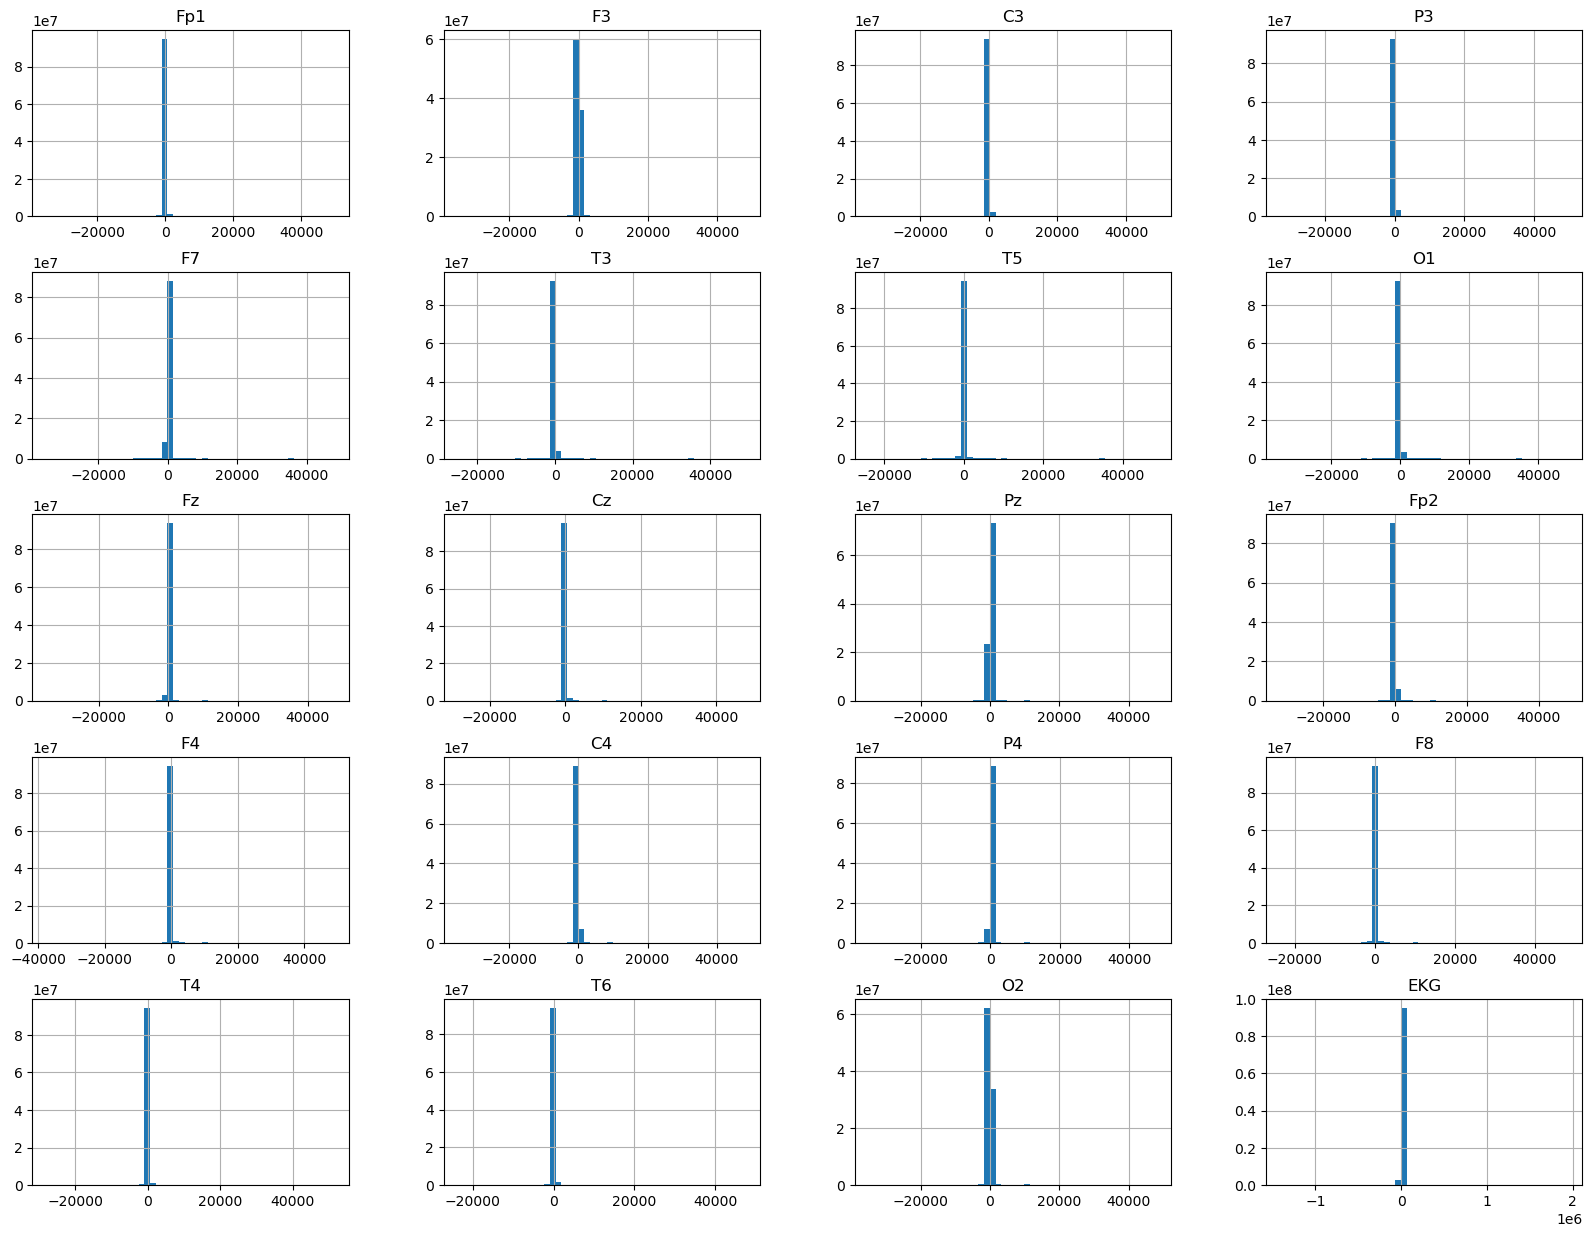

In [18]:
# Generar histogramas para todas las columnas en el DataFrame
datos_combinados_1.hist(figsize=(20, 15), bins=50)

# Mostrar los histogramas
plt.show()


###  Filtrado Global de Datos Usando Percentiles y Restablecimiento del Índice

**Inicialización de un Filtro Global:**
Comenzamos estableciendo **filtro_global** como un array de valores True, con la misma longitud que el número de filas en datos_combinados_1. Este filtro actuará como una máscara booleana para seleccionar filas que cumplen con ciertos criterios en todas las columnas.

**Cálculo de Percentiles y Actualización del Filtro Global:**
Iteramos sobre cada columna del DataFrame y calculamos los **percentiles 10 y 90**. Luego, actualizamos **filtro_global** para incluir solo aquellas filas donde los valores de la columna actual están dentro del rango interpercentil (entre el percentil 10 y 90). Utilizamos un operador **&=** para asegurarnos de que una fila debe cumplir con los criterios de filtrado en todas las columnas para ser retenida.

**Aplicación del Filtro Global al DataFrame:**
Después de actualizar **filtro_globa**l para todas las columnas, aplicamos este filtro a datos_combinados_1. Esto efectivamente **elimina todas las filas que tienen valores atípicos en cualquier columna.**

**Restablecimiento del Índice del DataFrame:**
Como el filtrado puede haber eliminado algunas filas, restablecemos el índice del DataFrame para **mantener la consistencia** y asegurarnos de que no haya huecos o índices desordenados. Usamos **reset_index(drop=True, inplace=True)** para lograr esto.

Este método de filtrado global es particularmente útil cuando queremos asegurarnos de que los datos en todas las columnas estén dentro de un rango razonable y deseamos evitar la influencia de valores atípicos en el análisis posterior. Al final de este proceso, datos_combinados_1 contiene datos más consistentes y representativos para su uso en análisis estadísticos o modelos predictivos.





In [19]:
# Inicializar un filtro global como True para todas las filas
filtro_global = [True] * len(datos_combinados_1)

for columna in datos_combinados_1.columns:
    # Calcular percentiles para cada columna
    percentil_10 = datos_combinados_1[columna].quantile(0.10)
    percentil_90 = datos_combinados_1[columna].quantile(0.90)
    
    # Actualizar el filtro global para cada columna
    filtro_global &= (datos_combinados_1[columna] >= percentil_10) & (datos_combinados_1[columna] <= percentil_90)

# Aplicar el filtro global al DataFrame
datos_combinados_1 = datos_combinados_1[filtro_global]

# Restablecer el índice después de filtrar
datos_combinados_1.reset_index(drop=True, inplace=True)


In [20]:
datos_combinados_1.describe()

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
count,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07,3.810902e+07
mean,-1.225974e+01,-1.403644e+01,-1.494767e+01,-1.382160e+01,-1.045286e+01,-1.322785e+01,-9.349533e+00,-1.054271e+01,-1.226290e+01,-1.164501e+01,-8.908251e+00,-7.193096e+00,-1.211393e+01,-1.122937e+01,-1.274459e+01,-1.307968e+01,-1.202778e+01,-1.353069e+01,-1.049231e+01,1.304273e+00
std,3.187326e+01,2.714728e+01,2.612557e+01,2.526004e+01,2.903360e+01,2.496618e+01,2.473868e+01,2.436814e+01,2.709852e+01,2.582010e+01,2.527649e+01,3.058616e+01,2.727990e+01,2.501323e+01,2.460868e+01,2.837235e+01,2.553248e+01,2.405165e+01,2.402627e+01,5.389830e+01
min,-1.151700e+02,-1.102300e+02,-9.556000e+01,-1.018900e+02,-1.028400e+02,-9.448000e+01,-9.251000e+01,-9.438000e+01,-9.800000e+01,-9.157000e+01,-9.613000e+01,-1.092600e+02,-1.042700e+02,-9.869000e+01,-9.601000e+01,-1.030400e+02,-9.342000e+01,-9.642000e+01,-9.437000e+01,-1.906500e+02
25%,-3.381000e+01,-3.191000e+01,-3.296000e+01,-3.110000e+01,-3.004000e+01,-2.987000e+01,-2.632000e+01,-2.678000e+01,-3.072000e+01,-2.947000e+01,-2.579000e+01,-2.728000e+01,-3.070000e+01,-2.778000e+01,-2.977000e+01,-3.217000e+01,-2.940000e+01,-2.963000e+01,-2.678000e+01,-2.043000e+01
50%,-1.115000e+01,-1.315000e+01,-1.477000e+01,-1.392000e+01,-9.570000e+00,-1.249000e+01,-8.990000e+00,-1.075000e+01,-1.241000e+01,-1.164000e+01,-8.640000e+00,-6.910000e+00,-1.196000e+01,-1.088000e+01,-1.303000e+01,-1.303000e+01,-1.170000e+01,-1.374000e+01,-1.045000e+01,1.320000e+00
75%,9.840000e+00,4.590000e+00,2.390000e+00,3.290000e+00,9.740000e+00,3.690000e+00,7.740000e+00,5.600000e+00,6.380000e+00,6.380000e+00,8.510000e+00,1.312000e+01,6.560000e+00,6.030000e+00,3.990000e+00,6.010000e+00,5.580000e+00,2.840000e+00,5.670000e+00,2.641000e+01
max,8.453000e+01,7.331000e+01,6.705000e+01,6.720000e+01,7.363000e+01,6.520000e+01,6.752000e+01,6.974000e+01,7.005000e+01,6.849000e+01,7.340000e+01,8.952000e+01,7.555000e+01,6.779000e+01,7.105000e+01,7.381000e+01,6.646000e+01,6.095000e+01,6.838000e+01,1.933100e+02


### Generación de Histogramas para Cada Columna

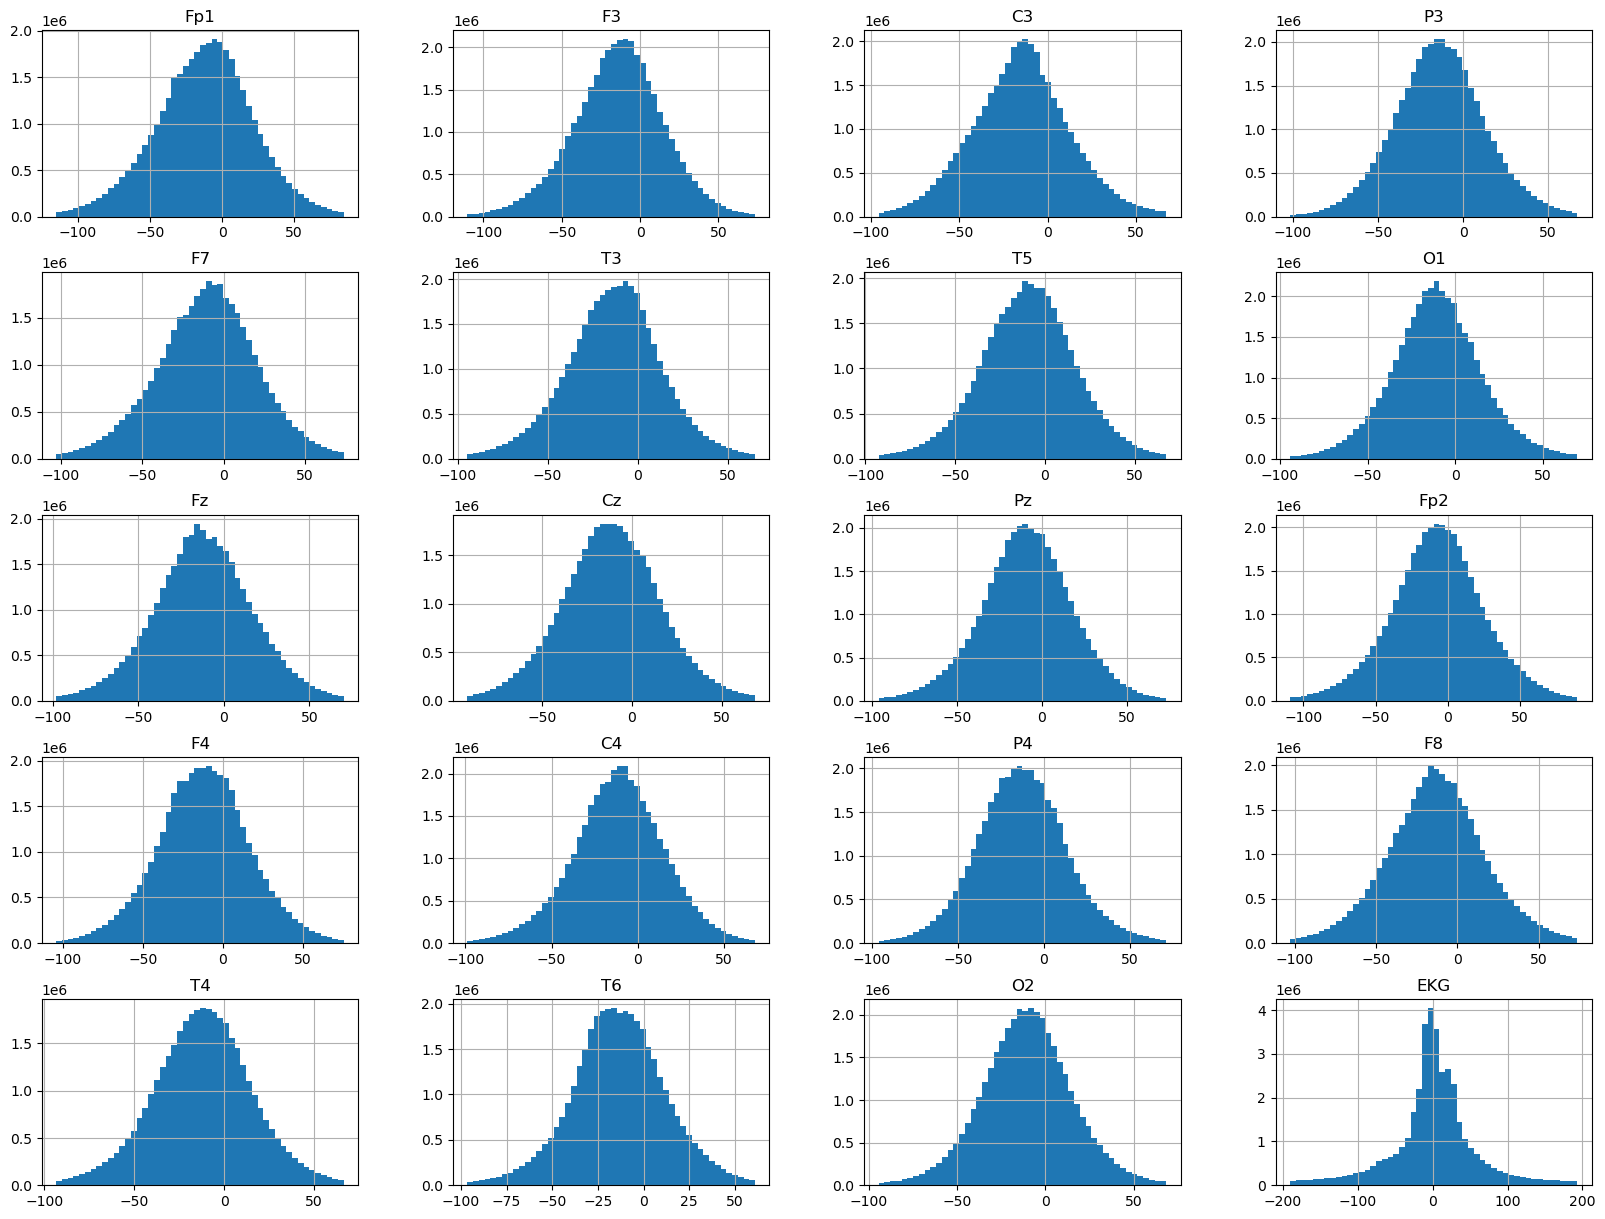

In [21]:
# Generar histogramas para todas las columnas en el DataFrame
datos_combinados_1.hist(figsize=(20, 15), bins=50)

# Mostrar los histogramas
plt.show()


### Generación del Histograma para la Columna 'Fp1 '(como prueba)

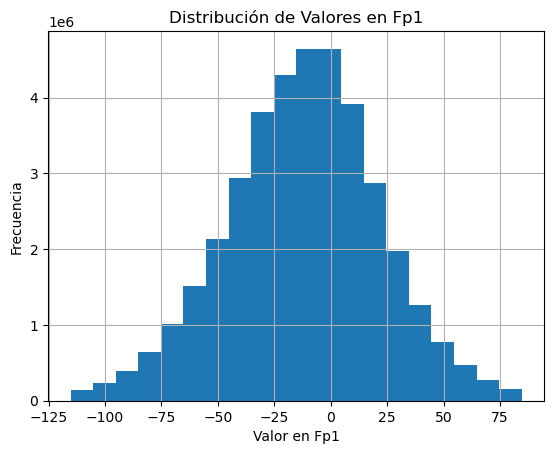

In [22]:
# Creando un histograma para visualizar la frecuencia de valores en la columna 'Fp1'
datos_combinados_1['Fp1'].hist(bins=20)  # Puedes ajustar el número de bins según tus necesidades
plt.title('Distribución de Valores en Fp1')
plt.xlabel('Valor en Fp1')
plt.ylabel('Frecuencia')
plt.show()


### Cambiar nonmbre de las columnas

La variable **nombres_actuales** contiene una lista de los nombres actuales de las columnas en el DataFrame. Estos nombres parecen ser códigos estándar utilizados en la representación de datos de encefalogramas **(EEG).**

Lista de Nombres Nuevos y Descriptivos: nombres_nuevos es una lista de **nombres más descriptivos para cada columna**. Estos nombres son más informativos y parecen reflejar la ubicación de los electrodos en un EEG, lo que podría ser **útil para una interpretación más clara de los datos.**

Este paso es particularmente **útil en la preparación y análisis de datos, especialmente cuando se trabaja con conjuntos de datos complejos como los EEG**. Tener nombres de columnas descriptivos **facilita mucho la comprensión de los datos** 

In [23]:
# Nombres actuales de las columnas en el orden que proporcionaste
nombres_actuales = [
    'Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 
    'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'C4', 'P4', 'F8', 
    'T4', 'T6', 'O2', 'EKG'
]

# Nombres nuevos y descriptivos para cada columna
nombres_nuevos = [
    'Polo Frontal Izquierdo', 'Frontal Izquierdo', 'Central Izquierdo', 'Parietal Izquierdo', 
    'Fronto-Temporal Izquierdo', 'Temporal Izquierdo', 'Temporo-Occipital Izquierdo', 'Occipital Izquierdo',
    'Línea Media Frontal', 'Línea Media Central', 'Línea Media Parietal', 
    'Polo Frontal Derecho', 'Frontal Derecho', 'Central Derecho', 'Parietal Derecho', 
    'Fronto-Temporal Derecho', 'Temporal Derecho', 'Temporo-Occipital Derecho', 'Occipital Derecho',
    'Electrocardiograma'
]

# Renombrar las columnas del DataFrame
datos_combinados_1.columns = nombres_nuevos


In [24]:
datos_combinados_1

,Polo Frontal Izquierdo,Frontal Izquierdo,Central Izquierdo,Parietal Izquierdo,Fronto-Temporal Izquierdo,Temporal Izquierdo,Temporo-Occipital Izquierdo,Occipital Izquierdo,Línea Media Frontal,Línea Media Central,Línea Media Parietal,Polo Frontal Derecho,Frontal Derecho,Central Derecho,Parietal Derecho,Fronto-Temporal Derecho,Temporal Derecho,Temporo-Occipital Derecho,Occipital Derecho,Electrocardiograma
0,-50.049999,-30.430000,-46.669998,-46.230000,-40.419998,-21.200001,-35.000000,-51.860001,-4.150000,-19.219999,-54.240002,-32.610001,-12.650000,-50.910000,-73.449997,12.830000,-2.780000,-87.500000,-41.869999,-16.580000
1,-47.040001,-28.660000,-40.549999,-43.500000,-39.410000,-19.260000,-40.099998,-54.349998,-3.790000,-19.150000,-49.810001,-33.419998,-8.710000,-48.669998,-69.180000,9.560000,-1.420000,-63.160000,-40.180000,76.239998
2,-52.790001,-29.270000,-39.849998,-43.700001,-38.580002,-17.600000,-34.040001,-51.830002,-5.800000,-18.549999,-49.750000,-40.070000,-9.220000,-46.939999,-65.320000,-0.880000,-5.560000,-70.860001,-33.759998,24.629999
3,-62.529999,-31.879999,-40.389999,-45.709999,-38.230000,-15.510000,-36.139999,-53.410000,-32.330002,-36.000000,-55.310001,-74.980003,-30.000000,-57.680000,-73.620003,-16.309999,-14.630000,-78.269997,-34.439999,-111.000000
4,-62.160000,-29.639999,-36.599998,-39.570000,-35.009998,-12.510000,-35.029999,-44.919998,-25.459999,-30.020000,-48.630001,-75.449997,-32.959999,-54.110001,-62.919998,-10.740000,-3.090000,-66.839996,-29.610001,-172.149994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38109015,41.540001,39.220001,31.209999,30.309999,71.510002,26.549999,22.330000,11.430000,23.190001,25.049999,16.520000,14.830000,-3.400000,-13.180000,9.940000,-8.920000,7.930000,16.410000,14.020000,-63.779999
38109016,38.520000,36.220001,11.360000,15.190000,55.500000,16.990000,16.280001,10.930000,17.780001,12.950000,8.560000,28.879999,21.030001,-24.040001,4.210000,-23.680000,-17.549999,2.250000,11.940000,36.389999
38109017,24.440001,16.010000,1.440000,6.720000,23.920000,-3.810000,-8.740000,-5.150000,3.600000,2.050000,3.510000,-40.060001,12.220000,-27.990000,1.720000,-32.230000,-12.420000,9.250000,3.820000,-18.879999
38109018,32.389999,33.099998,32.049999,48.340000,41.090000,17.250000,40.430000,41.480000,27.620001,28.290001,38.669998,40.630001,34.040001,15.220000,36.320000,16.709999,25.760000,33.509998,34.230000,10.330000


### Muestra de todos los histogrmas 

**Iteración Sobre las Columnas del DataFrame:** El bucle for columna in **datos_combinados_1.columns** recorre cada columna en datos_combinados_1. Para cada columna, se ejecutan una serie de comandos de visualización.

**Creación de una Figura para Cada Histograma:**
**plt.figure(figsize=(10, 6))** crea una nueva figura para cada histograma con un tamaño específico (10x6 pulgadas en este caso). **Es importante crear una nueva figura para cada columna para asegurarse de que los histogramas no se superpongan entre sí.**

**Generación y Configuración del Histograma:**
**datos_combinados_1[columna].hist(bins=20)** genera un histograma para la columna actual. Se especifican 20 "bins" o barras, lo cual determina cómo se agrupan los valores de los datos.

**Activación de la Cuadrícula y Mostrar el Histograma:**
**plt.grid(True)** activa la cuadrícula en el gráfico, lo que puede ayudar a **evaluar mejor** la escala y la distribución de los valores. **plt.show()** muestra la figura creada con el histograma.

Este enfoque de visualización es **muy útil** en el análisis exploratorio de datos, ya que proporciona una **visión clara de la distribución de los valores en cada columna del DataFrame**. Al visualizar cada columna individualmente, puedes **identificar rápidamente patrones, anomalías y tendencias en tus datos**, lo cual es fundamental para comprender las características subyacentes del conjunto de datos y para tomar decisiones informadas en etapas posteriores del análisis o modelado.



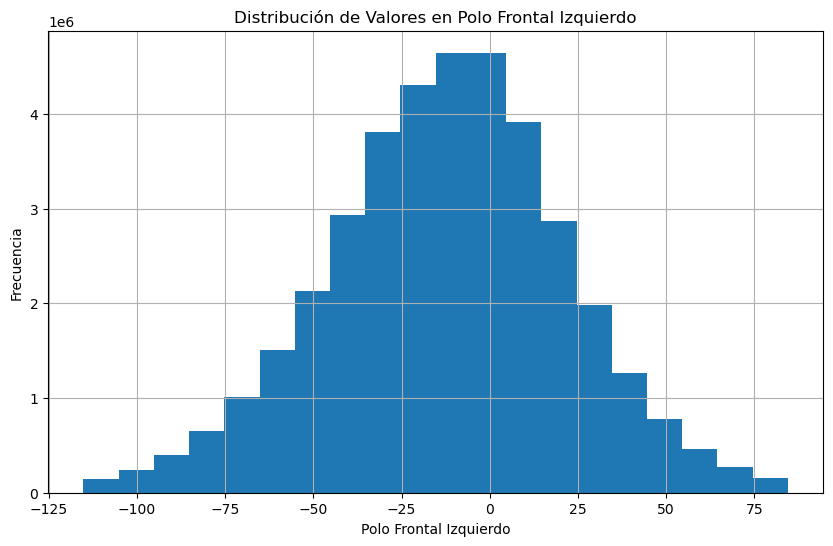

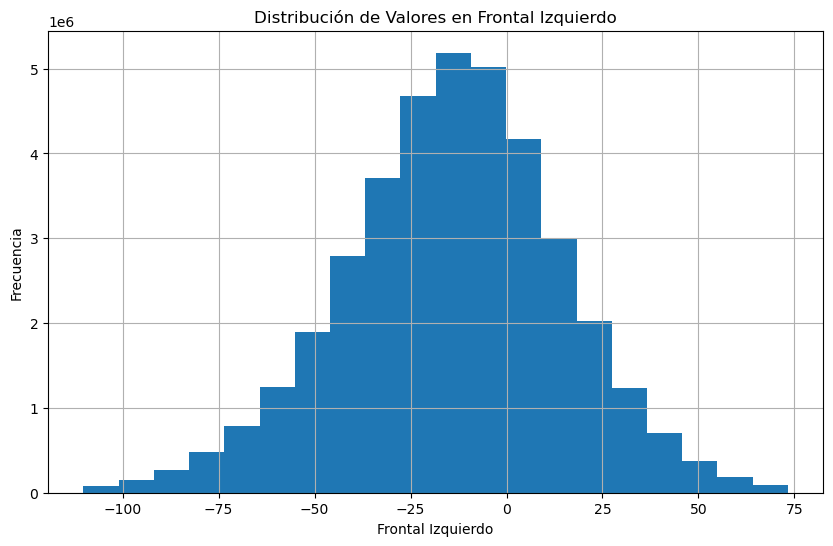

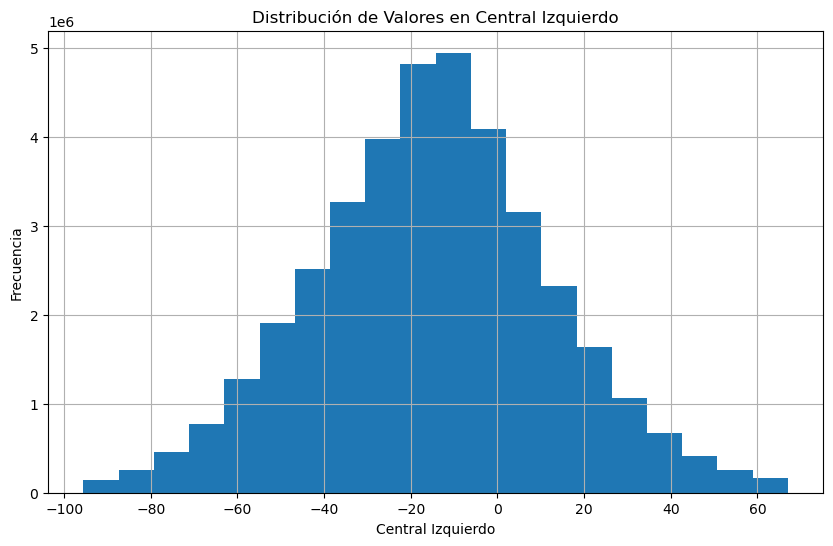

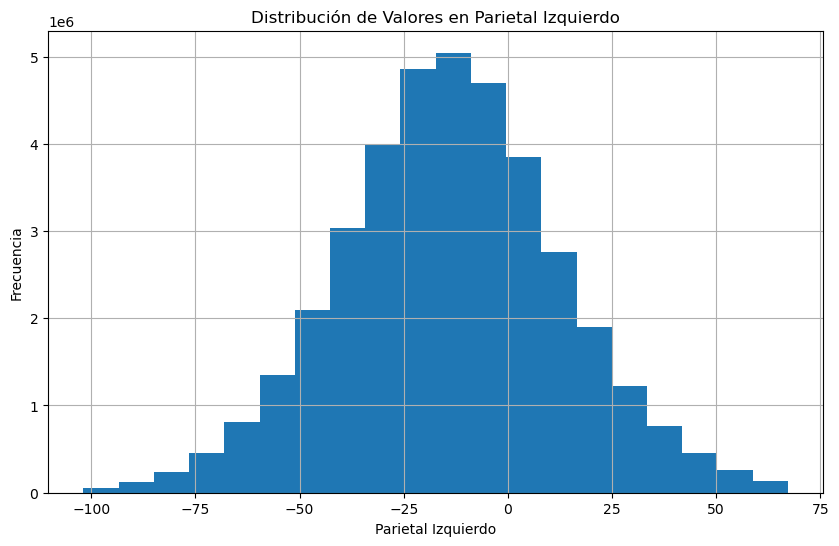

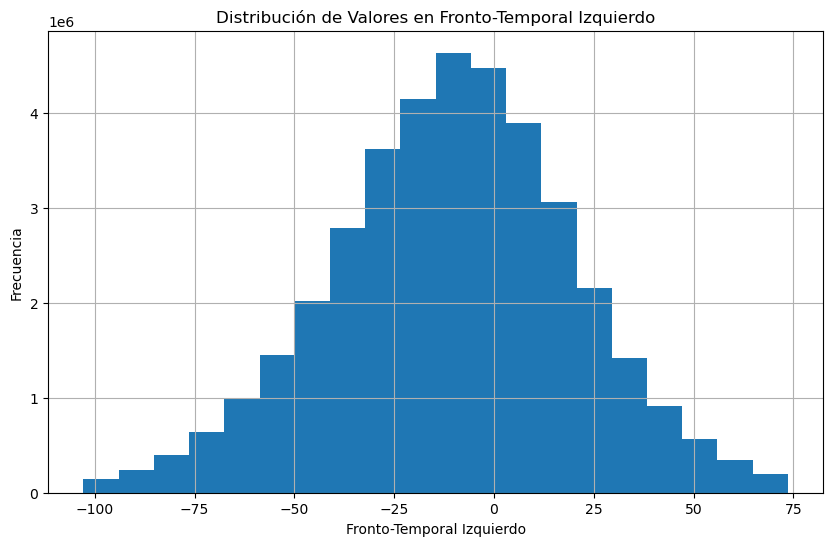

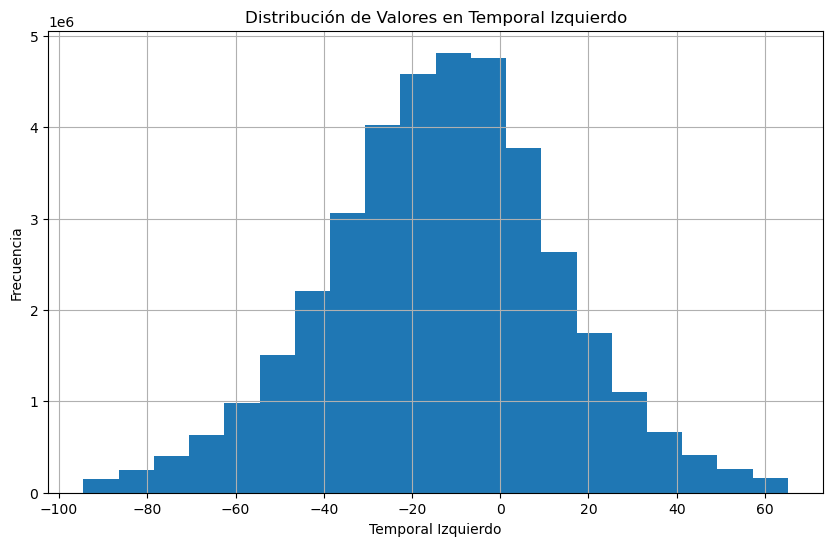

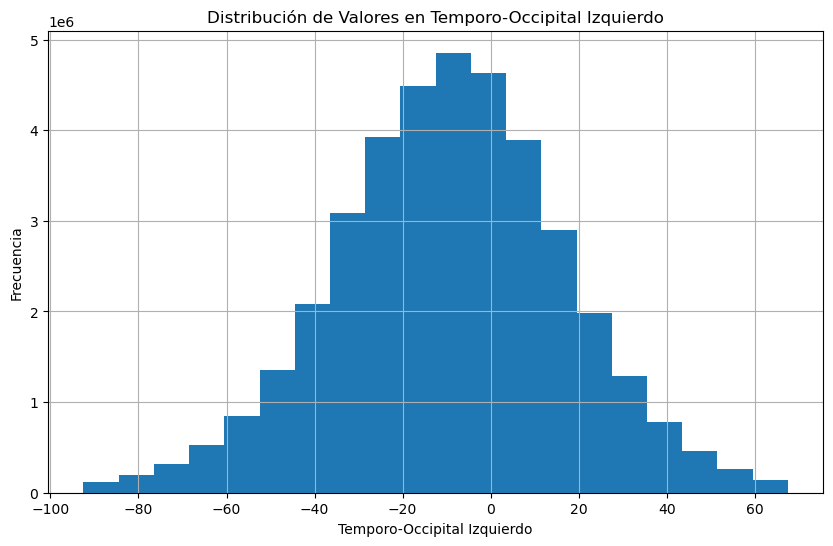

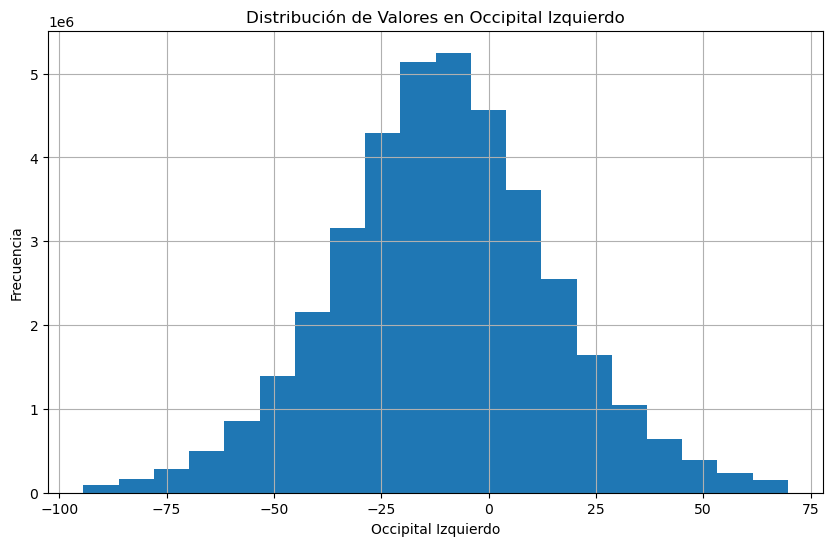

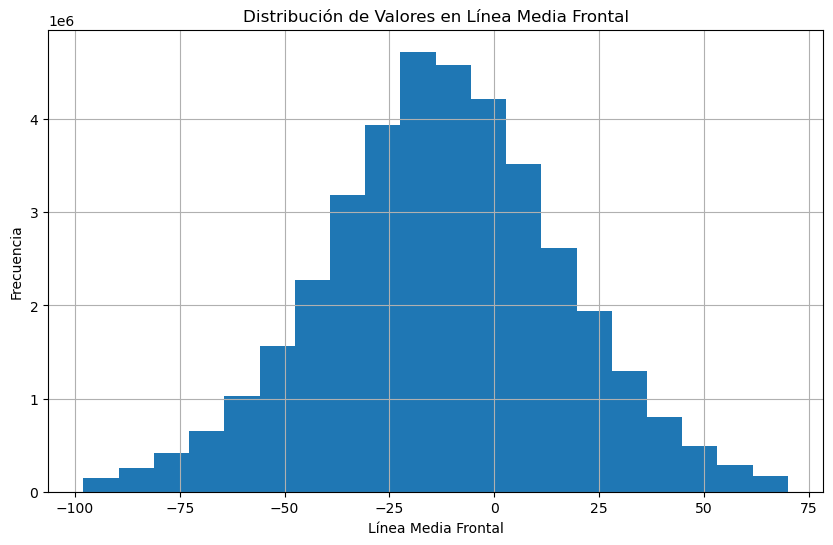

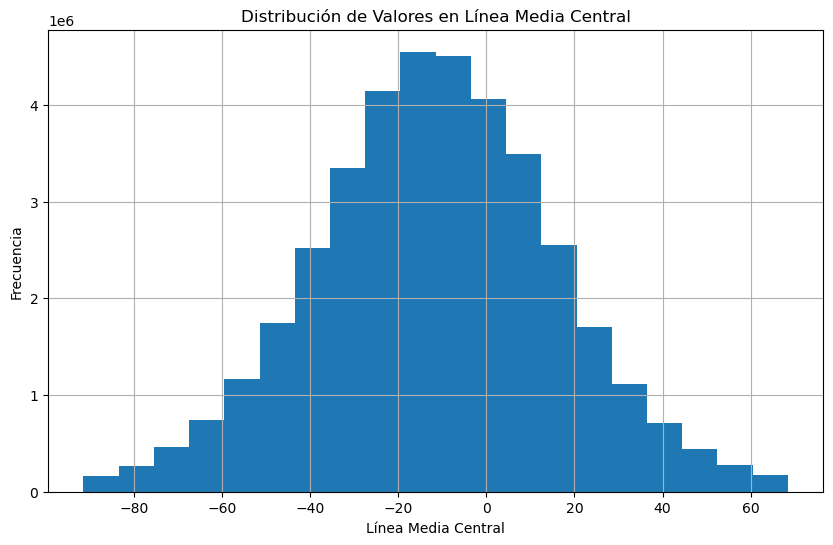

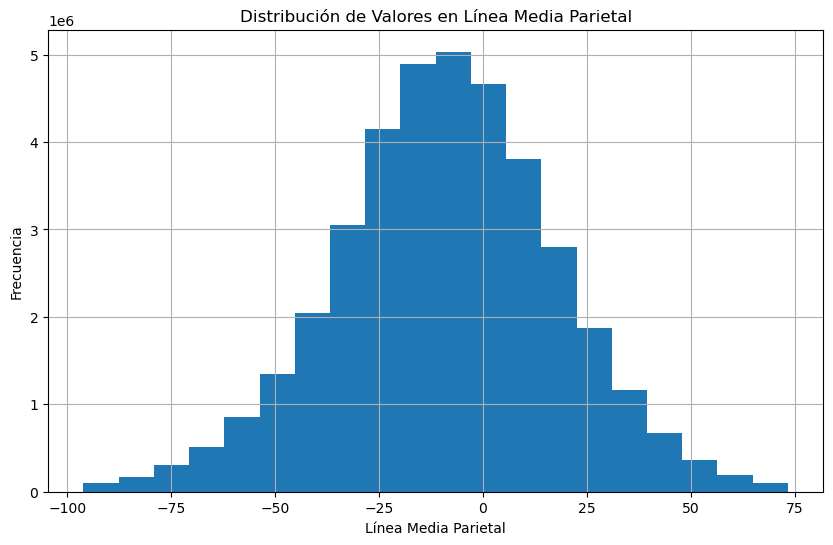

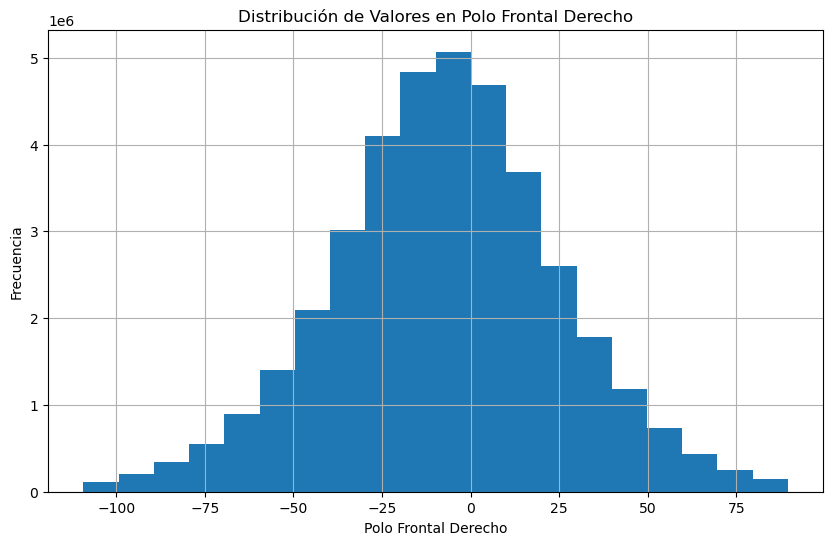

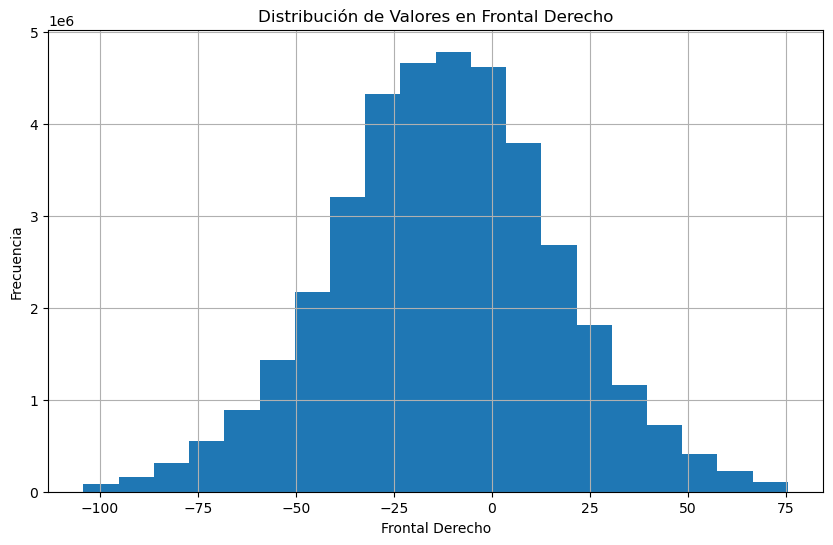

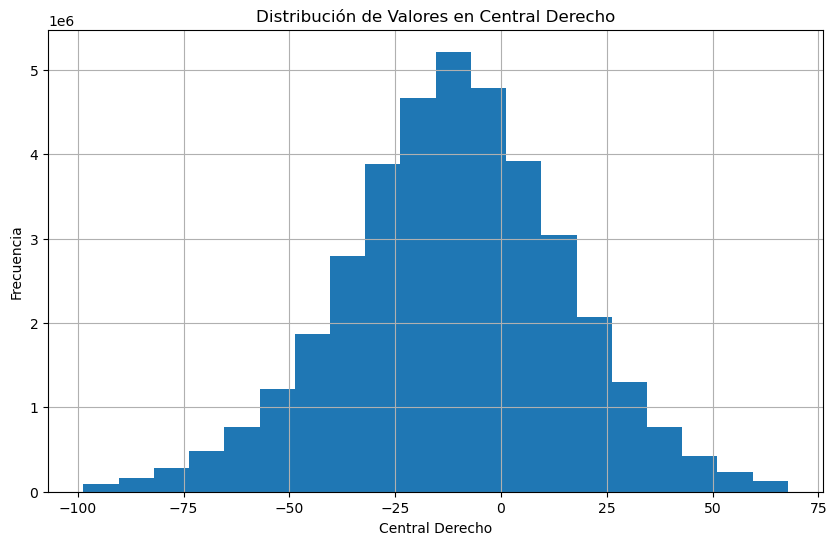

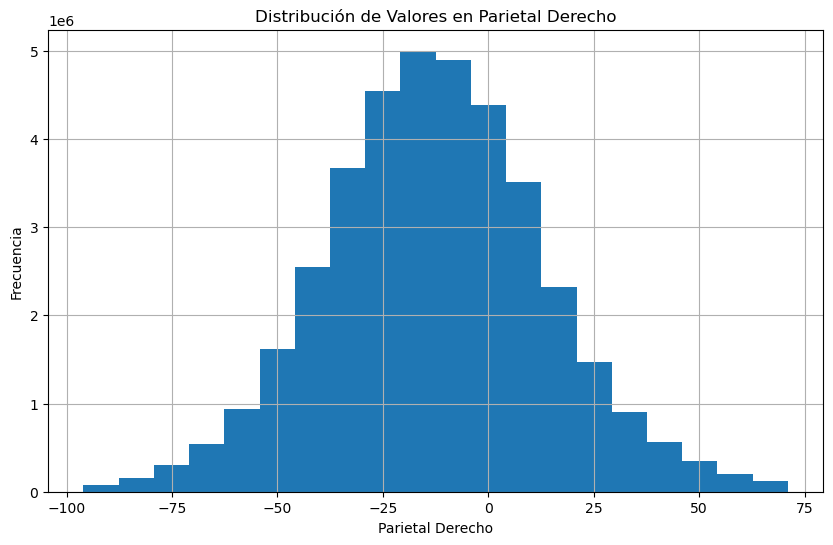

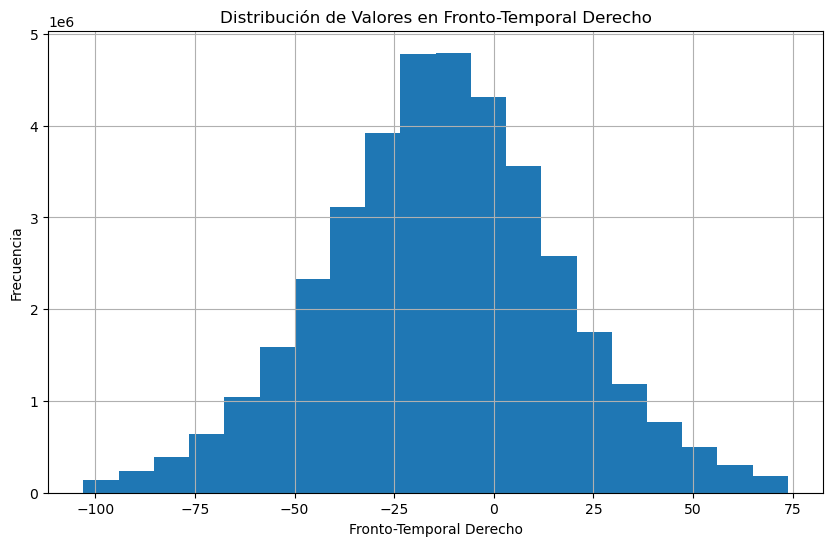

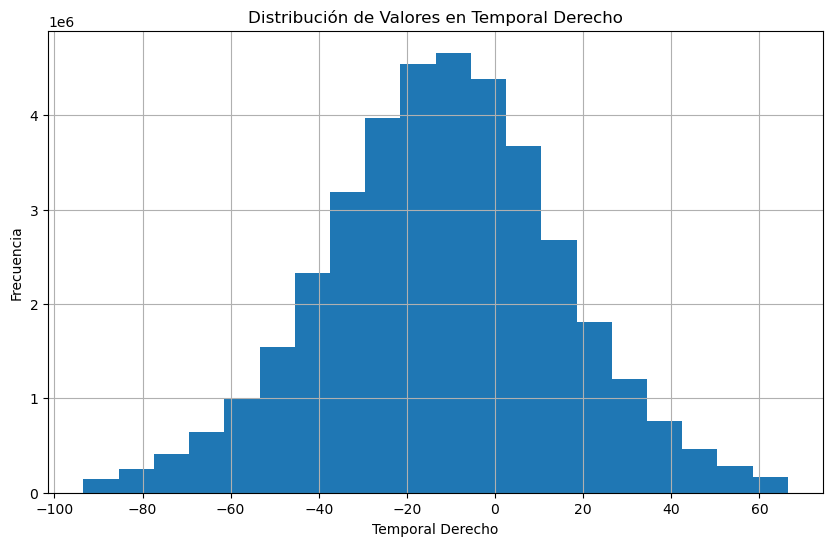

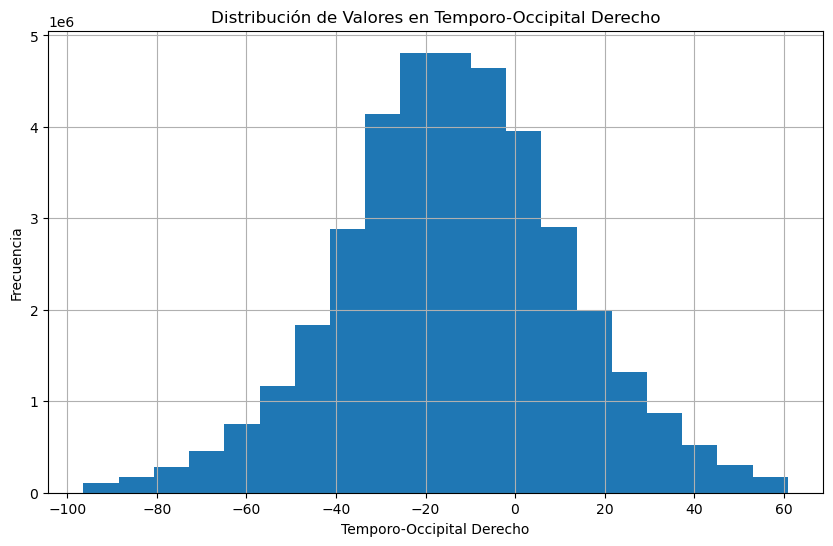

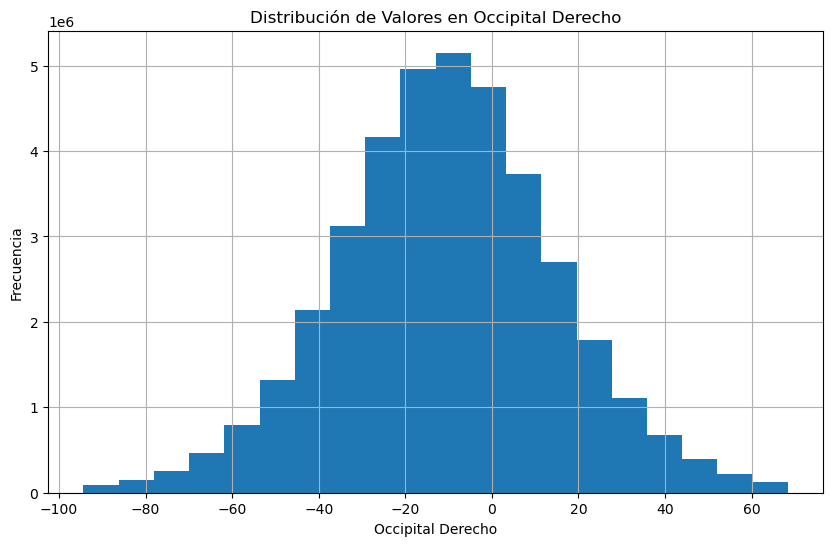

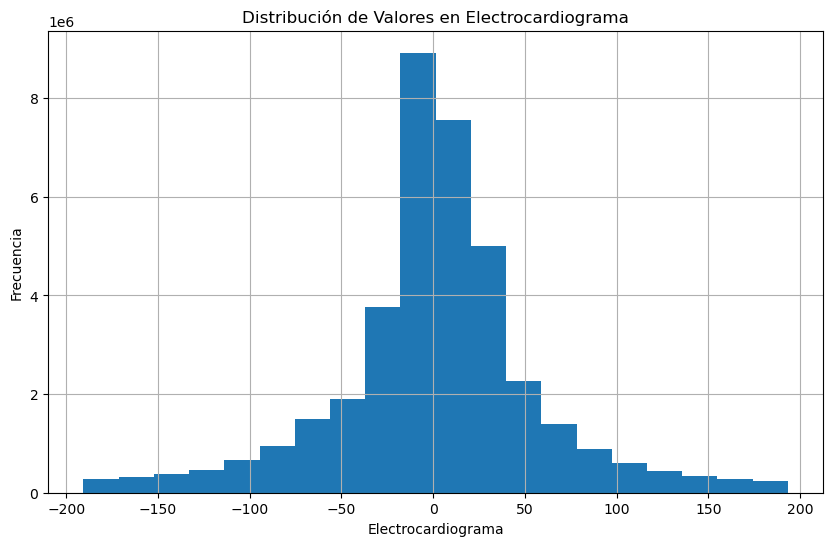

In [25]:
# Suponiendo que datos_combinados_1 ya está cargado y contiene las columnas de interés
for columna in datos_combinados_1.columns:
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
    datos_combinados_1[columna].hist(bins=20)  # Ajusta el número de bins según tus necesidades
    plt.title(f'Distribución de Valores en {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


### Captura del tiempo final.

In [26]:
tiempo_final = time.time()
tiempo_total =  tiempo_final - tiempo_inicial
print('El tiempo total del cuaderno ha sido de:' , tiempo_total / 60,'Minutos')

El tiempo total del cuaderno ha sido de: 30.422179782390593 Minutos
